# Descrição do Dataset ENADE

O Ministério da Educação disponibiliza os microdados gerados por avaliações, pesquisas e exames em todo o Brasil onde os arquivos com os dados podem ser encontrados em: http://inep.gov.br/web/guest/microdados.  Estão disponíveis para consulta e download os microdados gerados por essas avaliações, pesquisas e exames.

 Como fonte de análise deste trabalho, usaremos os microdados do Enade 2018,

Segundo o Inep, "o Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial." 

## Frequência de Aplicação

O exame do Enade é dividido em três anos, assim o Enade é aplicado em categorias de cursos diferentes em cada um desses 3 anos, até voltar para a primeira catégoria.  


###  Ano I

- Cursos de bacharelado nas áreas de conhecimento de Ciências Agrárias, Ciências da Saúde e áreas afins;    
- Cursos de bacharelado nas áreas de conhecimento de Engenharias e Arquitetura e Urbanismo; 
- Cursos Superiores de Tecnologia nas áreas de Ambiente e Saúde, Produção Alimentícia, Recursos Naturais, Militar e Segurança.

### Ano II

-  Cursos de bacharelado nas áreas de conhecimento de Ciências Biológicas; Ciências Exatas e da Terra; Linguística, Letras e Artes e áreas afins;
- Cursos de licenciatura nas áreas de conhecimento de Ciências da Saúde; Ciências Humanas; Ciências Biológicas; Ciências Exatas e da Terra; Linguística, Letras e Artes;
-  Cursos de bacharelado nas áreas de conhecimento de Ciências Humanas e Ciências da Saúde, com cursos avaliados no âmbito das licenciaturas;
-  Cursos Superiores de Tecnologia nas áreas de Controle e Processos Industriais, Informação e Comunicação, Infraestrutura e Produção Industrial.

### Ano III
- Cursos de bacharelado nas Áreas de Conhecimento Ciências Sociais Aplicadas e áreas afins;
-  Cursos de bacharelado nas Áreas de Conhecimento Ciências Humanas e áreas afins que não tenham cursos também avaliados no âmbito das licenciaturas;
- Cursos Superiores de Tecnologia nas áreas de Gestão e Negócios, Apoio Escolar, Hospitalidade e Lazer, Produção Cultural e Design.



### Objetivos 
Este trabalho trabalhará sobre os dados relativos ao ano de 2018, que se enquadra no ano III. 

# Importação do Dataset ENADE 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
name_path_csv = "DADOS_ENADE_2018/dataset_enade"
arquivo = open(name_path_csv)
df = pd.read_csv(arquivo, delimiter=";")
df['NT_GER'] = [str(val).replace(',', '.') for val in df['NT_GER']]
#cria a coluna Notas convertendo para numerico
df['Notas']=pd.to_numeric(df.NT_GER,errors='coerce')


In [2]:
#Eliminano colunas que foram geradas erroneamente
df = df.drop(columns=['Unnamed: 137','Unnamed: 138','Unnamed: 139','Unnamed: 140','Unnamed: 141', 'Unnamed: 142', 'Unnamed: 143'])

KeyError: "['Unnamed: 137' 'Unnamed: 138' 'Unnamed: 139' 'Unnamed: 140'\n 'Unnamed: 141' 'Unnamed: 142' 'Unnamed: 143'] not found in axis"

#### Classificação das notas de 1 até 10

In [20]:

lista = []
for i in df.itertuples():
    nota = i.Notas
    if nota <= 10:
        lista.append(1)
    elif nota >= 10.1 and nota <= 20:
        lista.append(2)
    elif nota >= 20.1 and nota <= 30:
        lista.append(3)
    elif nota >= 30.1 and nota <= 40:
        lista.append(4)
    elif nota >= 40.1 and nota <= 50:
        lista.append(5)
    elif nota >= 50.1 and nota <= 60:
        lista.append(6)
    elif nota >= 60.1 and nota <= 70:
        lista.append(7)
    elif nota >= 70.1 and nota <= 80:
        lista.append(8)
    elif nota >= 80.1 and nota <= 90:
        lista.append(9)
    elif nota >= 90.1 and nota <= 100:
        lista.append(10)
    else:
        lista.append(nota)
df['classe_notas'] = lista


In [2]:
lista = []
for i in df.itertuples():
    nota = i.Notas
    if nota <= 20:
        lista.append(1)
    elif nota >= 20.1 and nota <= 40:
        lista.append(2)
    elif nota >= 40.1 and nota <= 60:
        lista.append(3)
    elif nota >= 60.1 and nota <= 80:
        lista.append(4)
    elif nota >= 80.1 and nota <= 100:
        lista.append(5)
    else:
        lista.append(nota)
df['classe_notas2'] = lista

In [23]:
df['TP_SEXO'] = df['TP_SEXO'].apply(lambda x: x.replace('M','1').replace('F', '2'))
df['TP_SEXO'] = df['TP_SEXO'].astype(int)

AttributeError: 'float' object has no attribute 'replace'

In [3]:
from sklearn.metrics import precision_score
from sklearn import tree 

In [4]:
#1º selecionar as colunas para classificação
#2º retirar todos os dados ausentes

df_classificar = df[['QE_I06','QE_I07','QE_I08','QE_I09','classe_notas2']]
df_classificar = df_classificar.dropna()

In [5]:
#3º alterar o tipo dos dados para o tipo inteiro 

df_classificar['QE_I06'] = df_classificar['QE_I06'].apply(lambda x: x.replace('A','1').replace('B', '2').replace('C', '3').replace('D', '4').replace('E', '5').replace('F', '6').replace('G', '7').replace('H', '8'))
df_classificar['QE_I06'] = df_classificar['QE_I06'].astype(int)

df_classificar['QE_I07'] = df_classificar['QE_I07'].apply(lambda x: x.replace('A','1').replace('B', '2').replace('C', '3').replace('D', '4').replace('E', '5').replace('F', '6').replace('G', '7').replace('H', '8'))
df_classificar['QE_I07'] = df_classificar['QE_I07'].astype(int)

df_classificar['QE_I08'] = df_classificar['QE_I08'].apply(lambda x: x.replace('A','1').replace('B', '2').replace('C', '3').replace('D', '4').replace('E', '5').replace('F', '6').replace('G', '7').replace('H', '8'))
df_classificar['QE_I08'] = df_classificar['QE_I08'].astype(int)

df_classificar['QE_I09'] = df_classificar['QE_I09'].apply(lambda x: x.replace('A','1').replace('B', '2').replace('C', '3').replace('D', '4').replace('E', '5').replace('F', '6').replace('G', '7').replace('H', '8'))
df_classificar['QE_I09'] = df_classificar['QE_I09'].astype(int)

In [7]:
qnt_treino = (len(df)/100)*70 #70% do dataset

df_treino = df_classificar[['QE_I06','QE_I07','QE_I08','QE_I09']][:int(qnt_treino)]#70% do dataset para treino
df_treino_label = df_classificar['classe_notas2'][:int(qnt_treino)] #label para treino
df_treino_label = df_treino_label.astype(int)# converte para int

In [8]:
df_teste = df_classificar[['QE_I06','QE_I07','QE_I08','QE_I09']][int(qnt_treino):]#30% do datasete para teste
df_teste_label = df_classificar['classe_notas2'][int(qnt_treino):]#label para teste

In [9]:
clf = tree.DecisionTreeClassifier() # instância do classificador
clf = clf.fit(df_treino, df_treino_label) # fit encontra padrões nos dados

resultado_predict = clf.predict(df_teste)#realiza a classificação

In [10]:
y_true = df_teste_label
y_pred = resultado_predict
precision_score(y_true, y_pred, average='weighted')#Precisão do resultado

0.4148157832961361

## Trocando os valores em caracter para inteiro

In [2]:
#df['DS_VT_GAB_OFG_ORIG'].replace({'D': 1,'F': 2}, regex = True, inplace=True)
#df['DS_VT_GAB_OFG_ORIG'].replace('A', 1,regex = True)
#df['DS_VT_GAB_OFG_ORIG']

df['TP_SEXO'].replace({'M': 1,'F': 2}, regex = True, inplace=True)

df.replace({'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,'I': 9,'J': 10,'K': 11}, regex=True, inplace=True)

#Trocando o . & * por 0 nas colunas:
df['CO_RS_I1'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I2'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I3'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I4'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I5'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I6'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I7'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I8'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)
df['CO_RS_I9'].replace({'\.': 0, '\*': 0}, regex=True, inplace=True)

In [7]:
df['Notas']

0         42.0
1         59.0
2         60.0
3         25.0
4         42.0
          ... 
548122     NaN
548123     NaN
548124     NaN
548125     NaN
548126     NaN
Name: Notas, Length: 548127, dtype: float64

# Exploração do Dataset

### Número de Linhas e Colunas

In [8]:
print("Número de Linhas e Colunas",df.shape)

Número de Linhas e Colunas (548127, 138)


### Cabeçalho do Dataset

In [9]:
df.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,42.0
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,59.0
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,60.0
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,25.0
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,42.0


### Colunas do Dataset

In [10]:
df.columns.values

array(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO',
       'CO_CURSO', 'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
       'CO_REGIAO_CURSO', 'NU_IDADE', 'TP_SEXO', 'ANO_FIM_EM',
       'ANO_IN_GRAD', 'CO_TURNO_GRADUACAO', 'TP_INSCRICAO_ADM',
       'TP_INSCRICAO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X',
       'NU_ITEM_OFG_N', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X',
       'NU_ITEM_OCE_N', 'DS_VT_GAB_OFG_ORIG', 'DS_VT_GAB_OFG_FIN',
       'DS_VT_GAB_OCE_ORIG', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG',
       'DS_VT_ACE_OFG', 'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'TP_PRES',
       'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE',
       'TP_PR_DI_CE', 'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2',
       'TP_SCE_D3', 'NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG',
       'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2',
       'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE',
       'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'CO_RS_I1

## O dataset do Enade tem 135 colunas divididos em 9 partes, são elas:
- parte 1 - informações da instituição de ensino superior e do curso.s
- parte 2 - informações do estudante.
- parte 3 - número de questões da parte objetiva em formação geral e componente específico.
- parte 4 - vetores de gabarito.
- parte 5 - tipos de presença.
- parte 6 - tipos de situação das questões da parte discursiva.
- parte 7 - notas na formação geral e componente específico.
- parte 8 - questionário de percepção da prova.
- parte 9 - questionário do estudante.

Dessa forma o dataset foi considero bem completo e com ampla espaço para diversos tipos de pesquisas e objetivos. 

###  Imprimir os tipos do Dataset

In [11]:
print(df.dtypes[40:])

TP_SFG_D2      int64
TP_SCE_D1      int64
TP_SCE_D2      int64
TP_SCE_D3      int64
NT_GER        object
              ...   
QE_I65       float64
QE_I66       float64
QE_I67       float64
QE_I68       float64
Notas        float64
Length: 98, dtype: object


### Missing Values

In [4]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 
percentual =round(100*(df.isnull().sum()/len(df)),2)
print(percentual)

<ipython-input-4-a40364bc587e>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or


NU_ANO                0.00 
CO_IES                0.00 
CO_CATEGAD            0.00 
CO_ORGACAD            0.00 
CO_GRUPO              0.00 
CO_CURSO              0.00 
CO_MODALIDADE         0.00 
CO_MUNIC_CURSO        0.00 
CO_UF_CURSO           0.00 
CO_REGIAO_CURSO       0.00 
NU_IDADE              0.00 
TP_SEXO               0.00 
ANO_FIM_EM            0.00 
ANO_IN_GRAD           0.00 
CO_TURNO_GRADUACAO    0.00 
TP_INSCRICAO_ADM      0.00 
TP_INSCRICAO          0.00 
NU_ITEM_OFG           0.00 
NU_ITEM_OFG_Z         0.00 
NU_ITEM_OFG_X         0.00 
NU_ITEM_OFG_N         0.00 
NU_ITEM_OCE           0.00 
NU_ITEM_OCE_Z         0.00 
NU_ITEM_OCE_X         0.00 
NU_ITEM_OCE_N         0.00 
DS_VT_GAB_OFG_ORIG    0.00 
DS_VT_GAB_OFG_FIN     0.00 
DS_VT_GAB_OCE_ORIG    0.00 
DS_VT_GAB_OCE_FIN     0.00 
DS_VT_ESC_OFG         15.67
DS_VT_ACE_OFG         15.58
DS_VT_ESC_OCE         15.67
DS_VT_ACE_OCE         15.58
TP_PRES               0.00 
TP_PR_GER             0.00 
TP_PR_OB_FG         

### Visualização dos Missing Values

<AxesSubplot:>

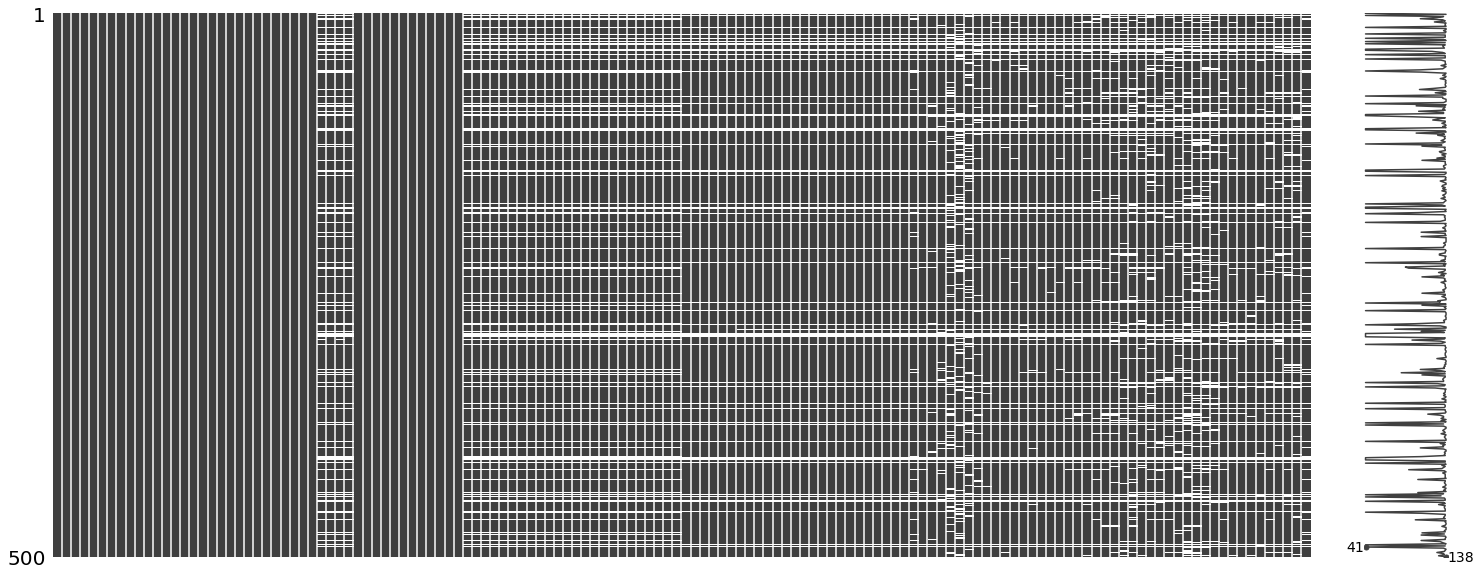

In [4]:
import missingno as msno 
#msno.matrix(df) 
msno.matrix(df.sample(500))


In [ ]:
# Visualize missing values as a matrix 
filtered_data = msno.nullity_filter(df, filter='botton', n=10) # or filter='botton'
im = msno.matrix(filtered_data)
im.get_figure().savefig("data.png")

In [ ]:
msno.bar(df) 


In [ ]:
import seaborn as sns


sns.heatmap(df.isnull(), cbar=False)


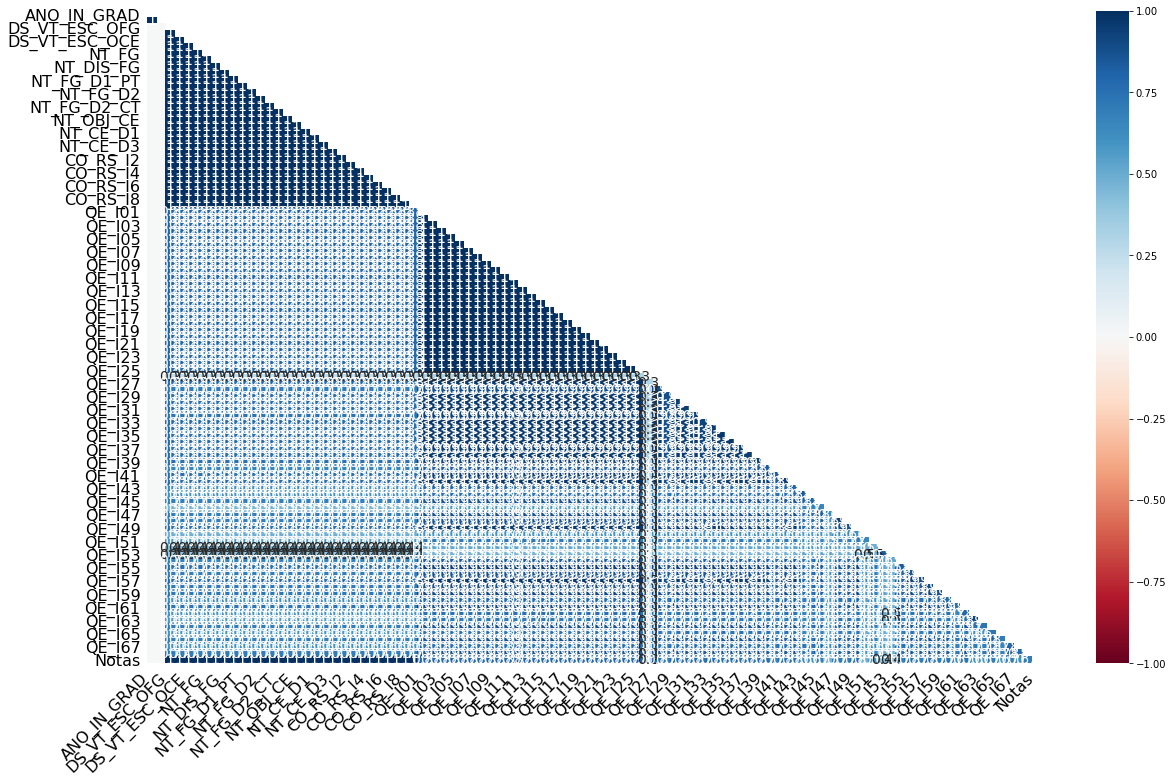

In [26]:
msno.heatmap(df)


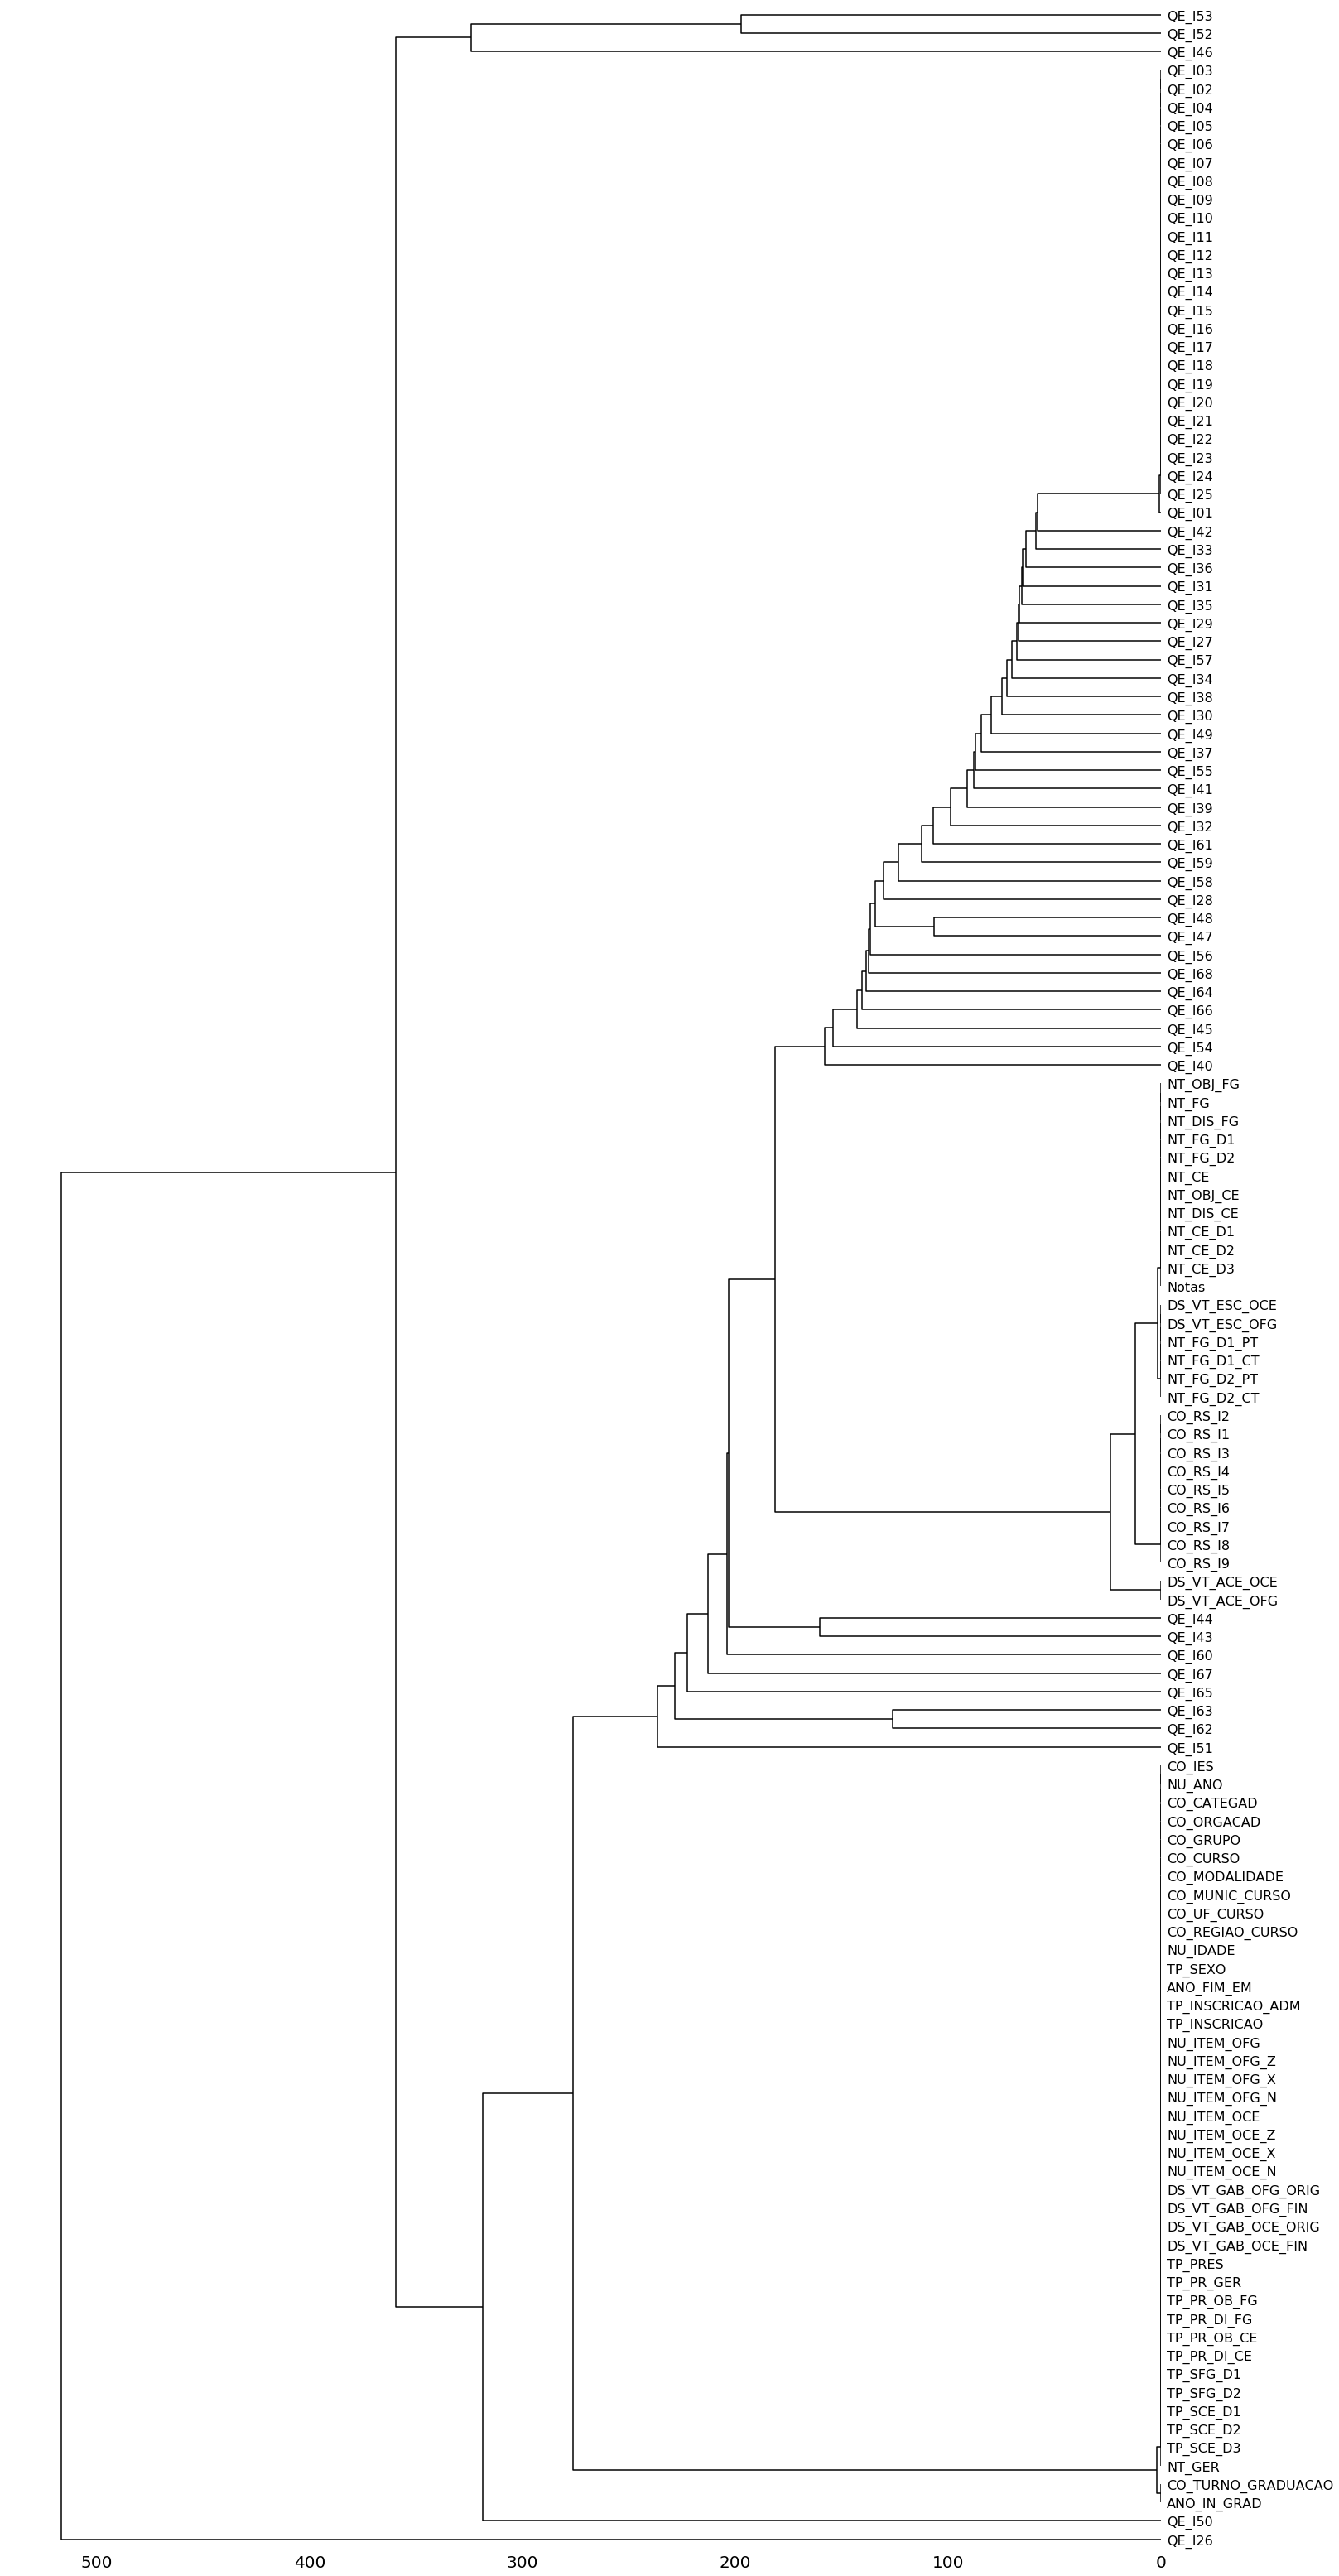

In [11]:
msno.dendrogram(df)


# Cálculo de Nota versus Sexo

In [2]:
# Converte de virgula para ponto
df['NT_GER'] = [str(val).replace(',', '.') for val in df['NT_GER']]
#cria a coluna Notas convertendo para numerico
df['Notas']=pd.to_numeric(df.NT_GER,errors='coerce')

# Filtra os dados necessários
NotasSexo=df.loc[:,["TP_SEXO","Notas"]]

# Faz o Agrupamento
Media=NotasSexo.groupby('TP_SEXO')['Notas'].mean()
Desvio=NotasSexo.groupby('TP_SEXO')['Notas'].std()
print("Media de Notas",Media)
print("Desvio de Notas",Desvio)


Media de Notas TP_SEXO
F    41.177415
M    42.557291
Name: Notas, dtype: float64
Desvio de Notas TP_SEXO
F    14.247662
M    14.769464
Name: Notas, dtype: float64


## Gráfico Notas versus Sexo

Text(0, 0.5, 'Notas')

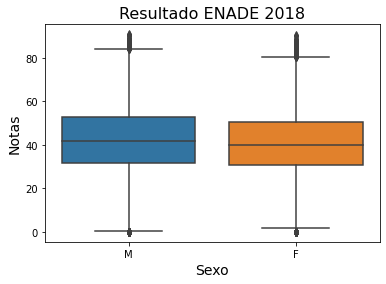

In [3]:
import seaborn as sns
%matplotlib inline
bplot=sns.boxplot(x='TP_SEXO',y='Notas', data=NotasSexo)
bplot.axes.set_title("Resultado ENADE 2018",fontsize=16)
bplot.set_xlabel("Sexo",fontsize=14)
bplot.set_ylabel("Notas",fontsize=14)


#### O resultado médio entre homens e mulheres são quase que similares, tanto na media quando no desvio pados das notas. Os homens tem resultado médio em: 42.55 e desvio padrão em: 14.76. As mulheres tem resultado médio em: 41.17 e desvio padrão em: 14.24

#### Podemos definir então que puramente o sexo não é um determinador de desempenho durante a graduação e consequêntemente no Enade.   

# Notas por Renda Familiar

In [4]:
# Filtra os dados necessários
RendaFamiliar=df.loc[:,["QE_I08","Notas"]]

Media=RendaFamiliar.groupby('QE_I08')['Notas'].mean()
Desvio=RendaFamiliar.groupby('QE_I08')['Notas'].std()

print("Media de Notas",Media)
print("Desvio de Notas",Desvio)

Media de Notas QE_I08
A    39.153890
B    39.838172
C    41.163529
D    43.263833
E    45.435685
F    48.488506
G    48.632532
Name: Notas, dtype: float64
Desvio de Notas QE_I08
A    14.077651
B    13.599200
C    13.892604
D    14.428556
E    14.942968
F    15.663728
G    16.288611
Name: Notas, dtype: float64


In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,14.27)})
%matplotlib inline

### Guafico de Pizza da quantidade de alunos por categoria, em determinada variável 

In [6]:

def qtd_alunos_por_categoria(var_media,var_analisada):
    #alunos = df[df[var_media] >= 0]
    alunos = df
    plt.figure(figsize=(10,6))
    alunos[var_analisada].value_counts().plot.pie(title=var_analisada)
    print(alunos[var_analisada].value_counts())

### Média e desvio padrão das notas dos alunos

In [7]:
def Media_e_desvio(var_analisada,opcoes_escolhidas):
    Media=opcoes_escolhidas.groupby(var_analisada)['Notas'].mean()
    Desvio=opcoes_escolhidas.groupby(var_analisada)['Notas'].std()
    print("Media de Notas",Media)
    print("Desvio de Notas",Desvio)

### Boxplot das notas

In [8]:
def notas_medias_na_variavel(var_analisada,opcoes_escolhidas):
    # Determine the order of boxes
    order = opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index
    
    # change the graphic size
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=order, ax=ax)  
    bplot.axes.set_title(str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)

C    45539
D    23454
B     6991
.     5351
E     4775
A     1601
*       59
Name: CO_RS_I1, dtype: int64


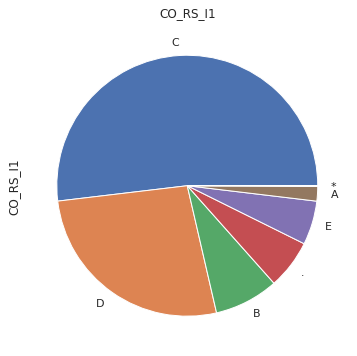

In [9]:
var_analisada = 'CO_RS_I1' #Grau de dificuldade da prova na parte de Formação Geral:
#A = Muito fácil.
#B = Fácil.
#C = Médio.
#D = Difícil.
#E = Muito difícil.
#. = Sem resposta
#* = Resposta anulada

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I1
*    36.220339
.    39.027696
A    40.770125
B    48.647825
C    42.785815
D    39.287929
E    36.767288
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I1
*    18.656558
.    15.700423
A    16.390291
B    15.614297
C    14.298360
D    13.258758
E    12.849806
Name: Notas, dtype: float64


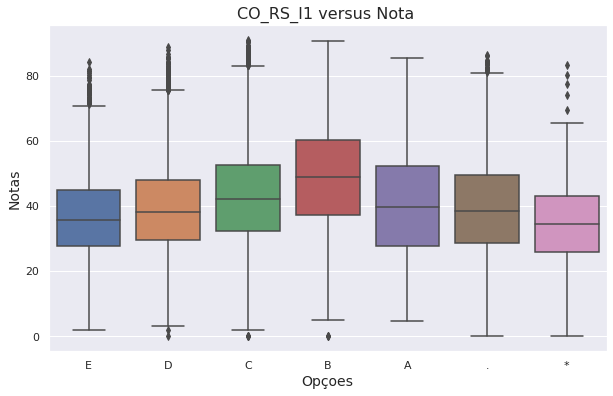

In [10]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    41019
D    31217
E     5653
.     5408
B     3605
A      821
*       47
Name: CO_RS_I2, dtype: int64


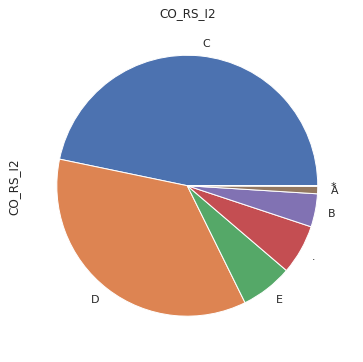

In [9]:
var_analisada = 'CO_RS_I2' #Grau de dificuldade da prova na parte de Componente Específico?:
#A = Muito fácil.
#B = Fácil.
#C = Médio.
#D = Difícil.
#E = Muito difícil.
#. = Sem resposta
#* = Resposta anulada

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I2
*    36.612766
.    39.027219
A    37.780390
B    45.075756
C    42.875296
D    40.948196
E    38.653971
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I2
*    16.005143
.    15.664132
A    15.556602
B    16.267679
C    14.651728
D    13.703461
E    13.307233
Name: Notas, dtype: float64


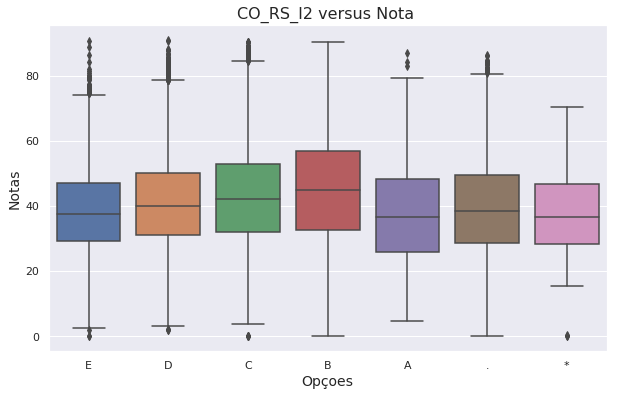

In [10]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    42416
B    19051
A    14037
.     5416
D     5153
E     1609
*       88
Name: CO_RS_I3, dtype: int64


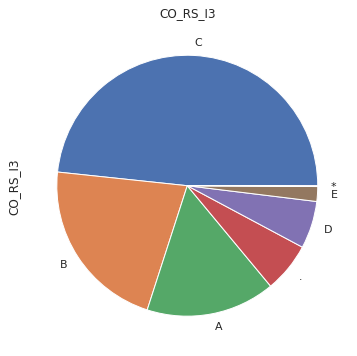

In [12]:
var_analisada = 'CO_RS_I3' # considerando a extensão da prova, em relação ao tempo total, você considera 
#que a prova foi:

#A = Muito longa.
#B = Longa.
#C = Adequada.
#D = Curta.
#E = Muito curta.
#. = Sem resposta
#* = Resposta anulada

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I3
*    38.161364
.    38.961817
A    40.613359
B    42.303911
C    42.283712
D    41.638191
E    39.355687
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I3
*    15.483602
.    15.649333
A    14.060840
B    14.406352
C    14.470873
D    14.050819
E    14.015225
Name: Notas, dtype: float64


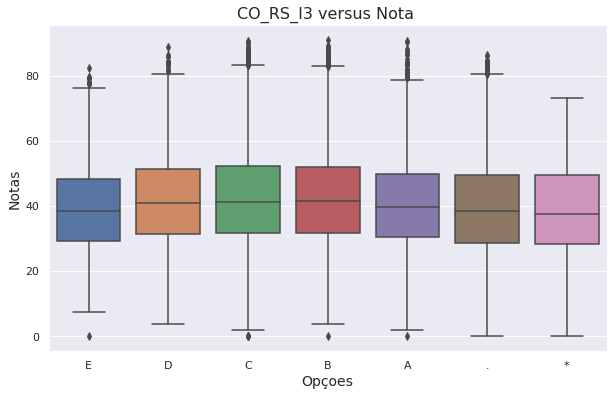

In [13]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    47360
C    13806
B     9485
E     7352
.     5937
A     3713
*      117
Name: CO_RS_I8, dtype: int64


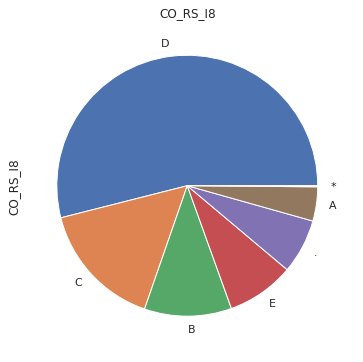

In [13]:
var_analisada = 'CO_RS_I8' # Considerando apenas as questões objetivas da prova, você percebeu que:
#A = Não estudou ainda a maioria desses conteúdos.
#B = Estudou alguns desses conteúdos, mas não os aprendeu.
#C = Estudou a maioria desses conteúdos, mas não os aprendeu.
#D = Estudou e aprendeu muitos desses conteúdos.
#E = Estudou e aprendeu todos esses conteúdos.
#. = Sem resposta
#* = Resposta anulada
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I8
*    38.364103
.    39.247027
A    34.381740
B    35.823216
C    38.586823
D    44.395257
E    43.738321
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I8
*    16.044628
.    15.571563
A    12.946108
B    12.504141
C    13.202021
D    14.279634
E    15.073270
Name: Notas, dtype: float64


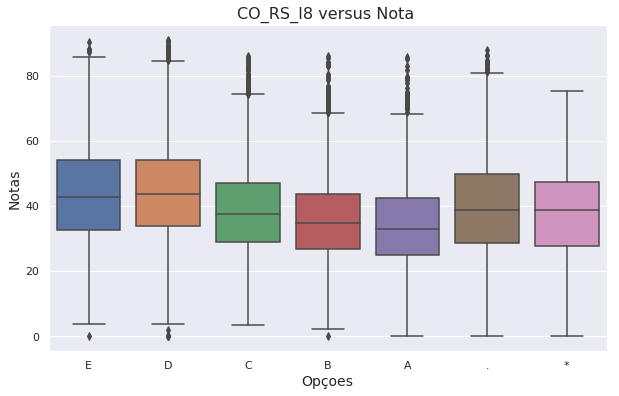

In [23]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    37650
C    24495
B    11278
E     7080
.     6270
A      884
*      113
Name: CO_RS_I9, dtype: int64


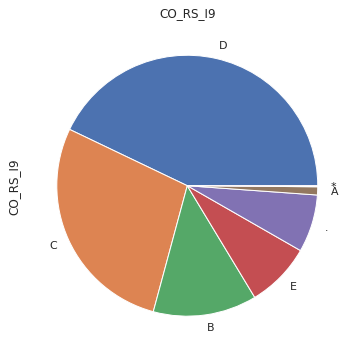

In [14]:
var_analisada = 'CO_RS_I9' #Tempo gasto por você para concluir a prova:
#A = Menos de uma hora.
#B = Entre uma e duas horas.
#C = Entre duas e três horas.
#D = Entre três e quatro horas.
#E = Quatro horas e não consegui terminar.
#. = Sem resposta
#* = Resposta anulada
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I9
*    41.883186
.    39.580080
A    32.817986
B    37.997730
C    41.370880
D    43.676237
E    41.461336
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I9
*    14.981655
.    15.520419
A    15.464863
B    14.661348
C    14.420271
D    14.001250
E    13.718317
Name: Notas, dtype: float64


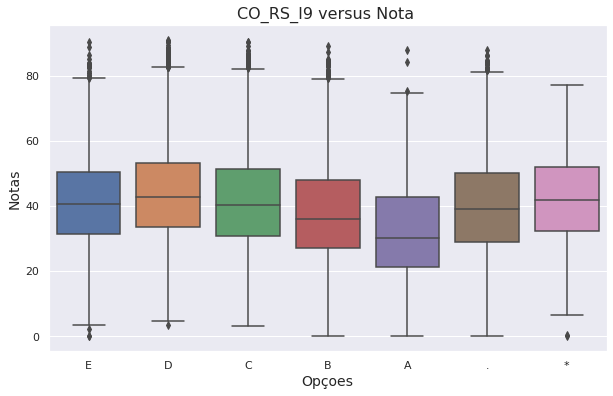

In [15]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    45539
D    23454
B     6991
.     5351
E     4775
A     1601
*       59
Name: CO_RS_I1, dtype: int64


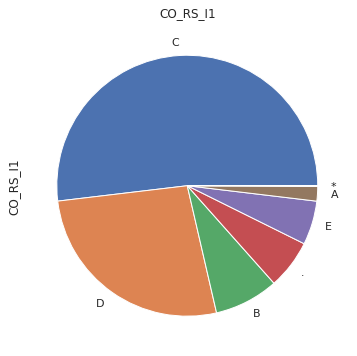

In [16]:
var_analisada = 'CO_RS_I1' #Grau de dificuldade da prova na parte de Formação Geral:
#A = Muito fácil.
#B = Fácil.
#C = Médio.
#D = Difícil.
#E = Muito difícil.
#. = Sem resposta
#* = Resposta anulada

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_RS_I1
*    36.220339
.    39.027696
A    40.770125
B    48.647825
C    42.785815
D    39.287929
E    36.767288
Name: Notas, dtype: float64
Desvio de Notas CO_RS_I1
*    18.656558
.    15.700423
A    16.390291
B    15.614297
C    14.298360
D    13.258758
E    12.849806
Name: Notas, dtype: float64


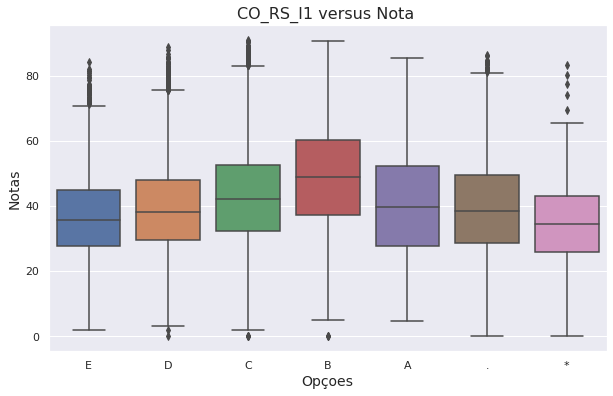

In [17]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    25479
C    20715
A    17066
D    10635
E    10616
F     6080
G     1229
Name: QE_I08, dtype: int64


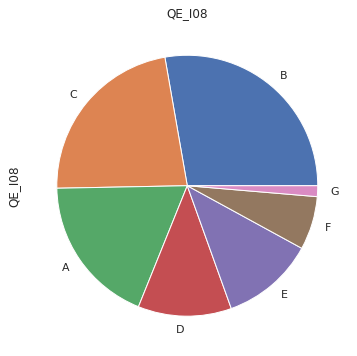

In [18]:
var_analisada = 'QE_I08' # Renda total da família, incluindo rendimentos do aluno:
#A = Até 1,5 salário mínimo (até R$ 1.431,00).
#B = De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00).
#C = De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00).
#D = De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00).
#E = De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00).
#F = De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00).
#G = Acima de 30 salários mínimos (mais de R$ 28.620,00).

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I08
A    39.153890
B    39.838172
C    41.163529
D    43.263833
E    45.435685
F    48.488506
G    48.632532
Name: Notas, dtype: float64
Desvio de Notas QE_I08
A    14.077651
B    13.599200
C    13.892604
D    14.428556
E    14.942968
F    15.663728
G    16.288611
Name: Notas, dtype: float64


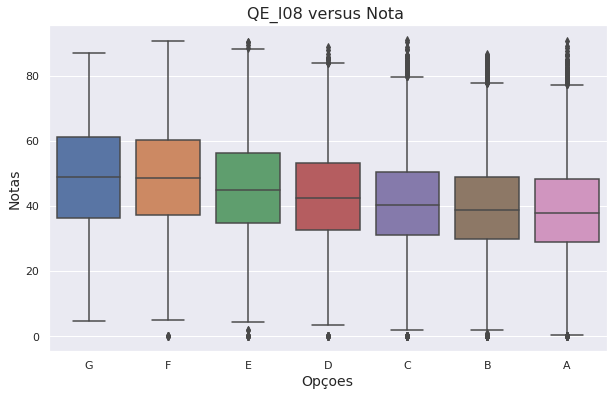

In [19]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

#### É observado pelos dados e pelo gráfico de Pizza, que grande partes dos estudantes se encontram em fámilias que recebem até 4,5 salários minimos, do outro ládo comparando com o montante de todos os estudantes, os que as famílias que recebem à partir de 10 salários mínimos são pouquissimos.
#### Com a análise desses indeces, concluimos previamente que quando a renda familiar dos estudantes são maiores, eles dentem a tirar notas mais altas do que estudantes que tem a renda familiar mais baixa. Outra observação é que há grande disparidade da nota média entre alunos com renda familiar superior à 10 salários mínimos dos estudantes com renda familiar inferior à 3 salários mínimos. Essa disparidade é de 48.63 para 39.83 respectivamente, assim a diverença na nota média é de 8,65 .

A    65275
B    20144
E     3275
C     2861
D      264
Name: QE_I01, dtype: int64


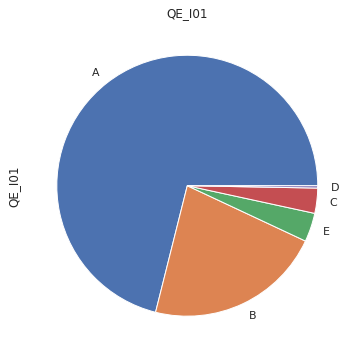

In [20]:
var_analisada = 'QE_I01' #Qual o seu estado civil?
#A = Solteiro(a).
#B = Casado(a).
#C = Separado(a) judicialmente/divorciado(a).
#D = Viúvo(a).
#E = Outro.

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I01
A    42.450254
B    40.088819
C    39.270104
D    38.208678
E    40.036476
Name: Notas, dtype: float64
Desvio de Notas QE_I01
A    14.744246
B    13.627886
C    13.256325
D    13.336530
E    13.547528
Name: Notas, dtype: float64


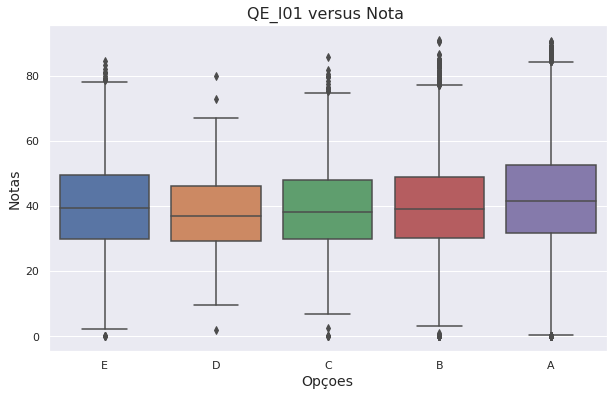

In [21]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

In [19]:
### Pré análise: Grande parte dos estudantes são solteiros, 

B    50274
C    27292
A     9256
D     4211
F      562
E      225
Name: QE_I06, dtype: int64


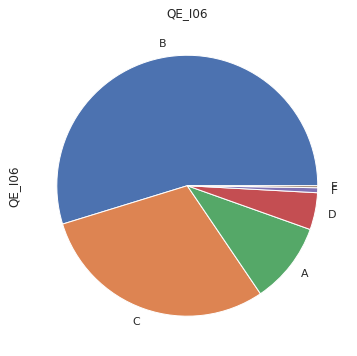

In [22]:
var_analisada = "QE_I06" #Onde e com quem mora atualmente: 
#A = Em casa ou apartamento, sozinho.
#B = Em casa ou apartamento, com pais e/ou parentes.
#C = Em casa ou apartamento, com cônjuge e/ou filhos.
#D = Em casa ou apartamento, com outras pessoas (incluindo república).
#E = Em alojamento universitário da própria instituição.
#F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I06
A    41.480485
B    42.325446
C    39.829911
D    46.964562
E    47.859070
F    43.602099
Name: Notas, dtype: float64
Desvio de Notas QE_I06
A    14.938539
B    14.555978
C    13.576838
D    15.471648
E    16.434000
F    16.026716
Name: Notas, dtype: float64


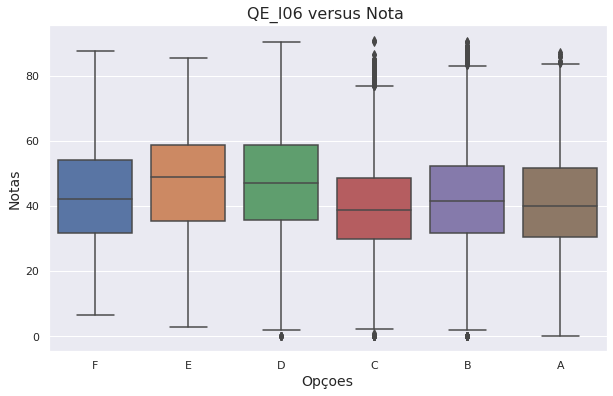

In [23]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    22385
C    22133
B    15387
E    12345
A    11459
F     5093
G     1756
H     1262
Name: QE_I07, dtype: int64


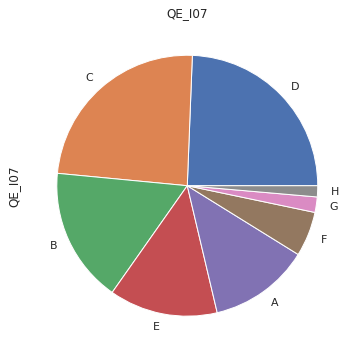

In [24]:
var_analisada= "QE_I07" # Quantas pessoas da família moram como aluno. Considere pais, irmãos, cônjuge, filhos e outros parentes que moram na mesma casa com você:
#A = Nenhuma.
#B = Uma.
#C = Duas.
#D = Três.
#E = Quatro.
#F = Cinco.
#G = Seis.
#H = Sete ou mais.

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I07
A    43.829044
B    41.874078
C    41.737032
D    42.042381
E    40.787813
F    39.386952
G    38.908848
H    39.037031
Name: Notas, dtype: float64
Desvio de Notas QE_I07
A    15.434187
B    14.422011
C    14.331927
D    14.438295
E    14.018106
F    13.818615
G    13.579796
H    13.654408
Name: Notas, dtype: float64


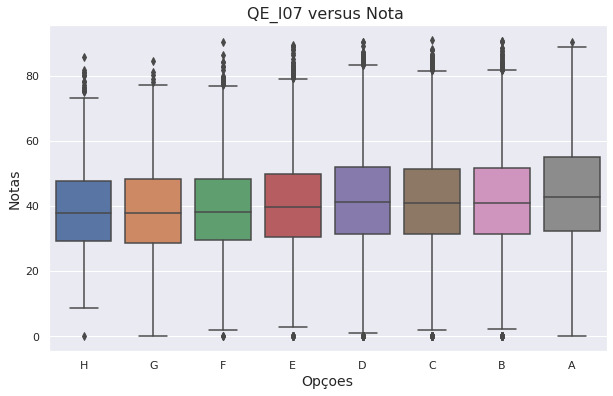

In [25]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

#### Quanto menos parentes morando junto, melhor será o desempenho do aluno

3    37151
4    30548
2    21424
5     6110
1     4766
Name: CO_REGIAO_CURSO, dtype: int64


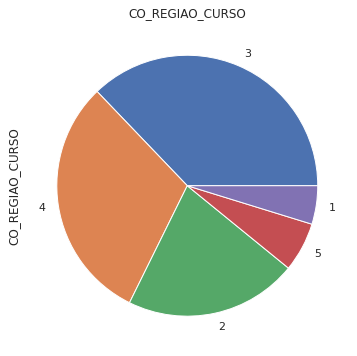

In [26]:
var_analisada = "CO_REGIAO_CURSO" # Região de do curso: 1 = Norte 2 = Nordeste 3 = Sudeste 4 = Sul 5 = Centro-Oeste
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_REGIAO_CURSO
1    40.457156
2    41.823026
3    42.969833
4    40.347581
5    41.451084
Name: Notas, dtype: float64
Desvio de Notas CO_REGIAO_CURSO
1    13.815488
2    14.594877
3    14.683601
4    13.932304
5    15.129636
Name: Notas, dtype: float64


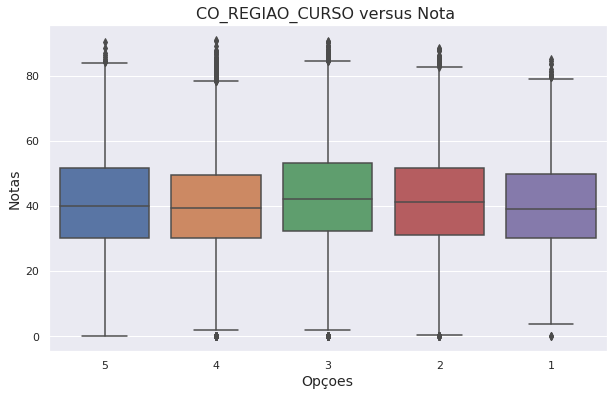

In [27]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

35    21586
41    16340
31     8823
42     8324
43     5884
33     4805
26     3999
24     3752
29     3616
22     2640
15     2614
25     2513
52     2155
23     1966
32     1937
53     1763
51     1734
21     1381
27     1073
13      616
17      543
28      484
11      466
50      458
16      295
14      151
12       81
Name: CO_UF_CURSO, dtype: int64


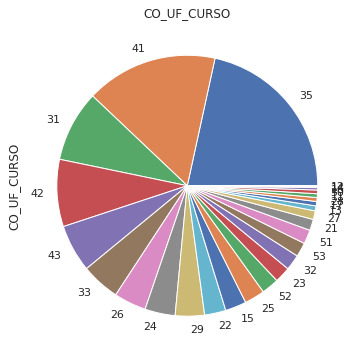

In [28]:
var_analisada = "CO_UF_CURSO" # Código da UF de funcionamento do curso:
#11 = Rondônia (RO) 
#12 = Acre (AC) 
#13 = Amazonas (AM)
#14 = Roraima (RR)
#15 = Pará (PA)
#16 = Amapa (AP)
#17 = Tocantins (TO)
#21 = Maranhão (MA)
#22= Piauí (PI)
#23 = Ceará (CE)
#24 = Rio Grande do Norte (RN)
#25 = Paraíba (PB)
#26 = Pernambuco (PE)
#27 = Alagoas (AL)
#28 = Sergipe (SE)
#29 = Bahia (BA)
#31 = Minas gerais (MG)
#32 = Espírito Santo (ES)
#33 = Rio de Janeiro (RJ)
#35 = São Paulo (SP)
#41 = Paraná (PR)
#42 = Santa Catarina (SC)
#43 = Rio Grande do Sul (RS)
#50 = Mato Grosso do Sul (MS)
#51 = Mato Grosso (MT)
#52 = Goiás (GO)
#53 = Distrito federal (DF)

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_UF_CURSO
11    41.938375
12    51.971186
13    38.839450
14    44.466667
15    41.163741
16    39.076296
17    35.930247
21    42.711436
22    39.011516
23    46.198820
24    42.296992
25    41.005943
26    40.078470
27    41.371318
28    50.190330
29    42.074142
31    44.736558
32    44.447574
33    45.328365
35    41.544666
41    40.480554
42    38.201202
43    42.871584
50    44.087317
51    40.099358
52    37.499898
53    47.375051
Name: Notas, dtype: float64
Desvio de Notas CO_UF_CURSO
11    13.488724
12    15.057980
13    12.220443
14    15.149336
15    14.211466
16    13.787307
17    11.521926
21    13.893480
22    13.565359
23    14.951703
24    14.655460
25    13.817280
26    14.236081
27    14.509382
28    15.752808
29    15.046516
31    15.283246
32    13.977836
33    15.412864
35    14.146032
41    13.995035
42    13.153293
43    14.327199
50    14.340214
51    13.885531
52    13.616728
53    16.488359
Name: Notas, dtype: float64


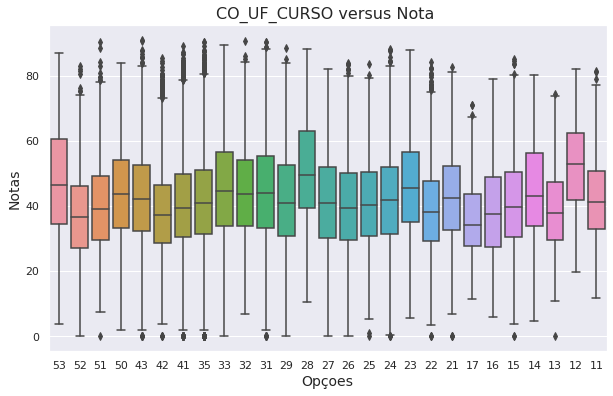

In [29]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

4    76700
1    13701
3     6346
2     3252
Name: CO_TURNO_GRADUACAO, dtype: int64


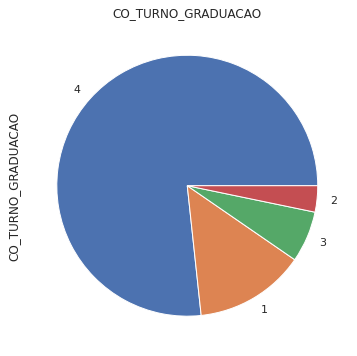

In [30]:
var_analisada = "CO_TURNO_GRADUACAO" # turno de graduação: 1 = Matutino 2 = Vespertino 3 = Integral 4 = Noturno
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_TURNO_GRADUACAO
1    46.104381
2    44.871419
3    49.202747
4    40.171939
Name: Notas, dtype: float64
Desvio de Notas CO_TURNO_GRADUACAO
1    14.949839
2    15.339403
3    16.030090
4    13.818364
Name: Notas, dtype: float64


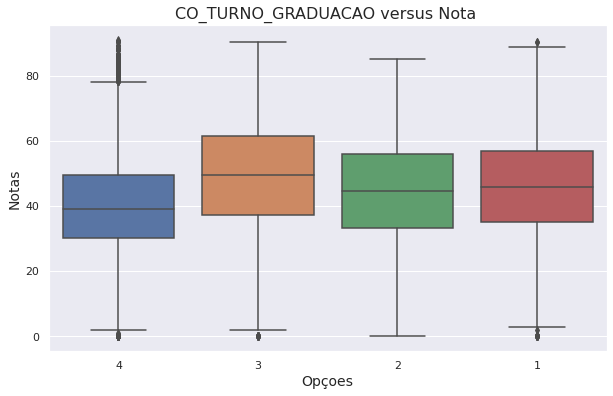

In [31]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    51022
D    28777
B     7926
C     2108
F     1716
E      271
Name: QE_I02, dtype: int64


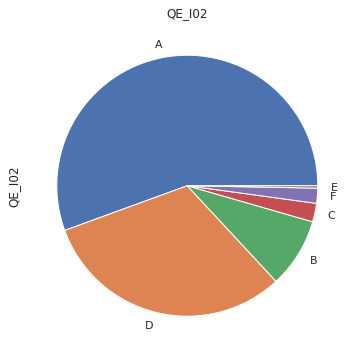

In [32]:
var_analisada= "QE_I02" # Cor da pele: 
#A = Branca.
#B = Preta.
#C = Amarela.
#D = Parda.
#E = Indígena.
#F = Não quero declarar.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I02
A    42.470909
B    41.591146
C    40.183550
D    40.470690
E    38.161847
F    44.615068
Name: Notas, dtype: float64
Desvio de Notas QE_I02
A    14.615975
B    14.365777
C    14.265447
D    14.069103
E    13.824039
F    15.289009
Name: Notas, dtype: float64


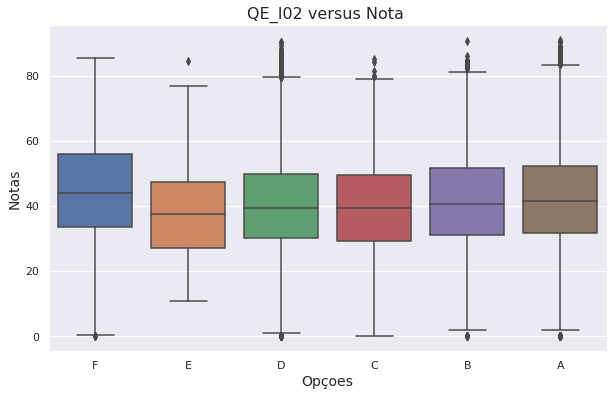

In [33]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    90949
B      636
C      235
Name: QE_I03, dtype: int64


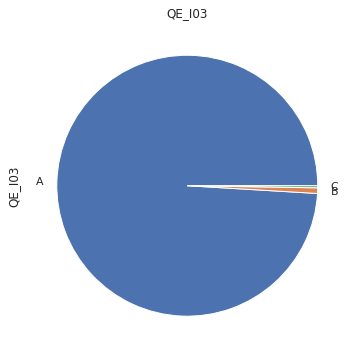

In [34]:

var_analisada= "QE_I03" # Nacionalidade: 
#A = Brasileira.
#B = Brasileira naturalizada.
#C = Estrangeira.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I03
A    41.795643
B    35.524550
C    38.109955
Name: Notas, dtype: float64
Desvio de Notas QE_I03
A    14.465024
B    12.667032
C    14.385757
Name: Notas, dtype: float64


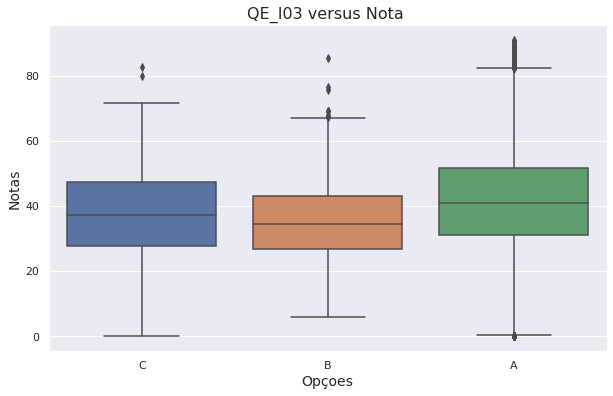

In [35]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    28237
B    26113
C    14387
E    12024
A     6977
F     4082
Name: QE_I04, dtype: int64


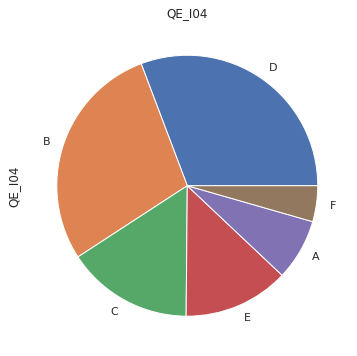

In [39]:
var_analisada= "QE_I04" # Etapa de escolarização que o pai concluiu:
#A = Nenhuma.
#B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#D = Ensino Médio.
#E = Ensino Superior - Graduação.
#F = Pós-graduação.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I04
A    39.505549
B    39.396657
C    41.074661
D    42.371717
E    44.886498
F    49.369529
Name: Notas, dtype: float64
Desvio de Notas QE_I04
A    13.885335
B    13.466788
C    13.773247
D    14.519822
E    15.442141
F    15.887192
Name: Notas, dtype: float64


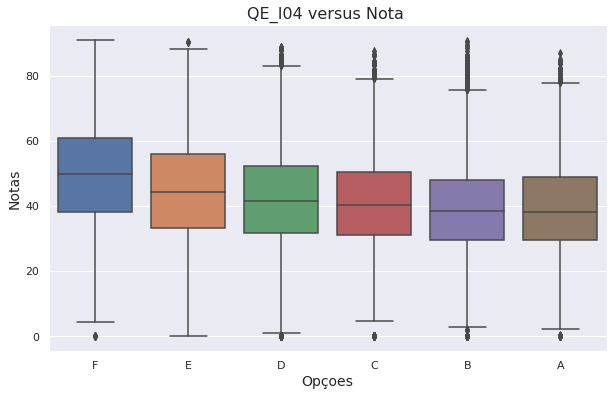

In [40]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    29868
B    22277
C    14170
E    12958
F     7531
A     5016
Name: QE_I05, dtype: int64


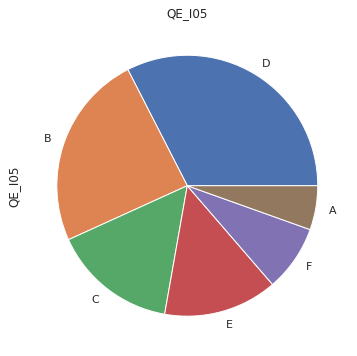

In [41]:
var_analisada= "QE_I05" # Etapa de escolarização a mãe concluiu:
#A = Nenhuma.
#B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#D = Ensino Médio.
#E = Ensino Superior - Graduação.
#F = Pós-graduação.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I05
A    39.098704
B    39.242832
C    40.774956
D    42.016109
E    44.639985
F    46.630687
Name: Notas, dtype: float64
Desvio de Notas QE_I05
A    14.194589
B    13.376677
C    13.700016
D    14.452265
E    15.225239
F    15.599658
Name: Notas, dtype: float64


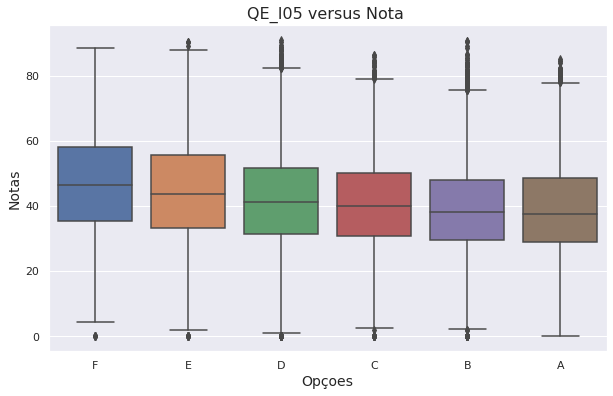

In [42]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    25162
B    20458
E    19249
D    12364
F     8579
A     6008
Name: QE_I09, dtype: int64


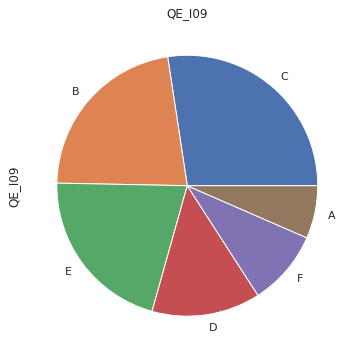

In [43]:
var_analisada= "QE_I09" # alternativa que melhor descreve a situação financeira (incluindo bolsas):
#A = Não tenho renda e meus gastos são financiados por programas governamentais.
#B = Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas.
#C = Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos.
#D = Tenho renda e não preciso de ajuda para financiar meus gastos.
#E = Tenho renda e contribuo com o sustento da família.
#F = Sou o principal responsável pelo sustento da família.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I09
A    41.140197
B    43.175379
C    42.976305
D    40.601265
E    39.781999
F    41.056020
Name: Notas, dtype: float64
Desvio de Notas QE_I09
A    14.530910
B    14.915019
C    14.781982
D    14.119862
E    13.622588
F    13.941294
Name: Notas, dtype: float64


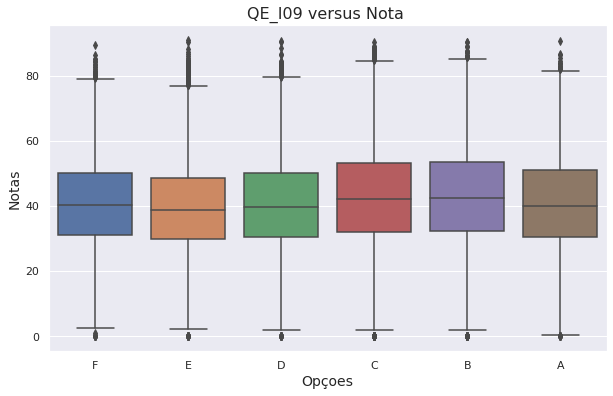

In [44]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

E    40203
A    31340
D     9865
B     5292
C     5120
Name: QE_I10, dtype: int64


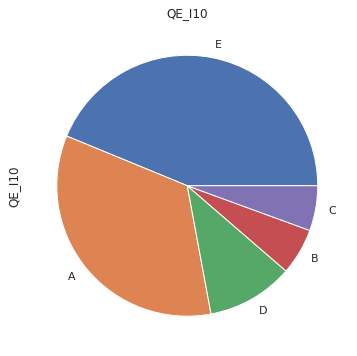

In [45]:
var_analisada= "QE_I10" # Alternativa que melhor descreve a situação de trabalho (exceto estágio ou bolsas):
#A = Não estou trabalhando.
#B = Trabalho eventualmente.
#C = Trabalho até 20 horas semanais.
#D = Trabalho de 21 a 39 horas semanais.
#E = Trabalho 40 horas semanais ou mais.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I10
A    43.804008
B    40.910467
C    41.853134
D    43.034771
E    39.887590
Name: Notas, dtype: float64
Desvio de Notas QE_I10
A    15.070376
B    15.045781
C    14.929271
D    14.610948
E    13.514567
Name: Notas, dtype: float64


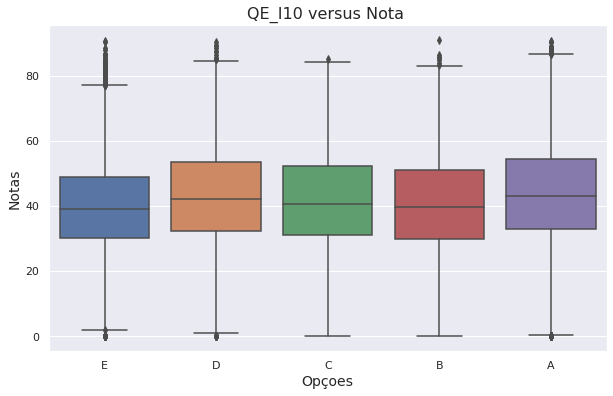

In [46]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    32727
A    17879
E    15495
H     8151
C     6563
I     3207
G     2746
D     2148
J     1531
F      915
K      458
Name: QE_I11, dtype: int64


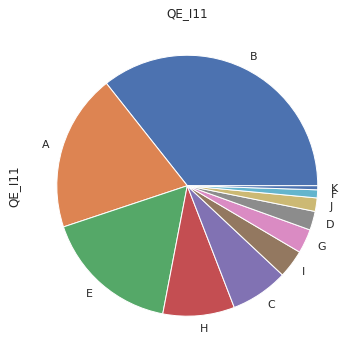

In [47]:
var_analisada= "QE_I11" # Tipo de bolsa de estudos ou financiamento do curso recebido para custear todas ou a 
#maior parte das mensalidades. No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração:
#A = Nenhum, pois meu curso é gratuito.
#B = Nenhum, embora meu curso não seja gratuito.
#C = ProUni integral.
#D = ProUni parcial, apenas.
#E = FIES, apenas.
#F = ProUni Parcial e FIES.
#G = Bolsa oferecida por governo estadual, distrital ou municipal.
#H = Bolsa oferecida pela própria instituição.
#I = Bolsa oferecida por outra entidade (empresa, ONG, outra).
#J = Financiamento oferecido pela própria instituição.
#K = Financiamento bancário.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I11
A    48.516081
B    39.597884
C    46.472357
D    42.168087
E    38.411231
F    41.255530
G    38.105674
H    41.005991
I    40.310671
J    37.572990
K    35.416092
Name: Notas, dtype: float64
Desvio de Notas QE_I11
A    15.653123
B    13.824242
C    13.393812
D    12.754913
E    12.904150
F    13.022479
G    12.569100
H    14.026416
I    13.356955
J    12.805738
K    13.725650
Name: Notas, dtype: float64


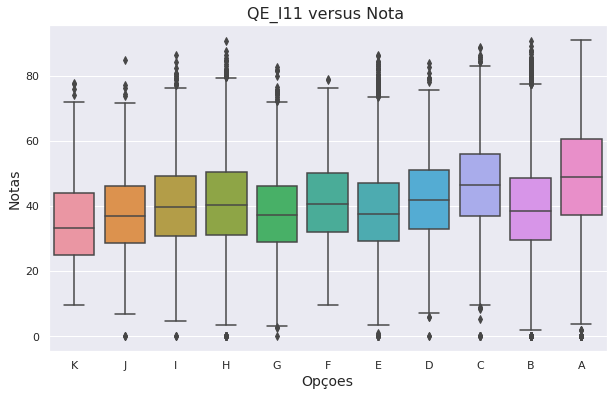

In [48]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

10005    28381
10008    26109
118      16474
10002     9647
10001     4465
115       3513
10003     3351
10007     2907
121       2788
93         830
116        440
10006      426
10009      327
120        270
17634       71
Name: CO_CATEGAD, dtype: int64


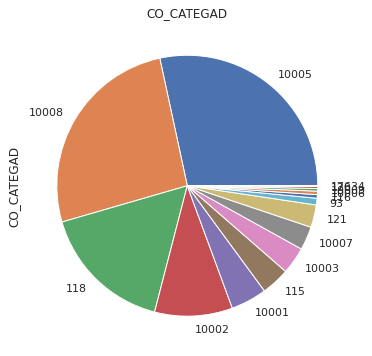

In [11]:
var_analisada= "CO_CATEGAD" # Código da categoria administrativa da instituição:
#1 = Pública Federal
#2 = Pública Estadual
#3 = Pública Municipal
#4 = Privada com fins lucrativos
#5 = Privada sem fins lucrativos
#7 = Especial

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_CATEGAD
93       49.972654
115      47.784568
116      41.993382
118      39.511059
120      41.317355
121      40.174811
10001    45.921585
10002    51.230933
10003    40.282095
10005    39.018688
10006    47.829457
10007    43.568013
10008    40.847813
10009    38.375085
17634    36.422581
Name: Notas, dtype: float64
Desvio de Notas CO_CATEGAD
93       14.459630
115      14.933033
116      14.030265
118      13.312769
120      13.364617
121      13.059835
10001    15.270728
10002    15.671202
10003    14.051310
10005    13.246831
10006    13.750126
10007    14.770273
10008    14.027453
10009    13.517233
17634    11.614779
Name: Notas, dtype: float64


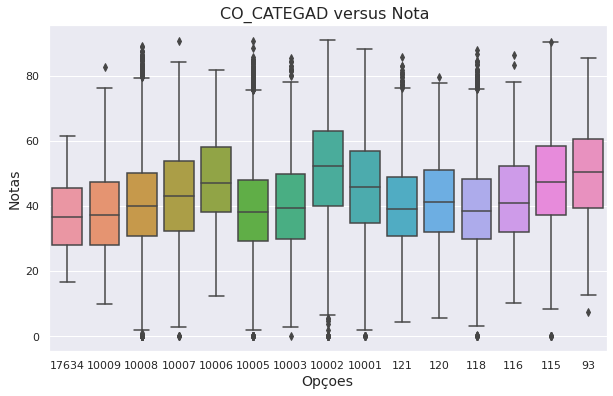

In [12]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

In [17]:
df['CO_CATEGAD'].value_counts()

10005    28381
10008    26109
118      16474
10002     9647
10001     4465
115       3513
10003     3351
10007     2907
121       2788
93         830
116        440
10006      426
10009      327
120        270
17634       71
Name: CO_CATEGAD, dtype: int64

A    63300
B    20217
D     4484
E     3486
F      236
C       97
Name: QE_I17, dtype: int64


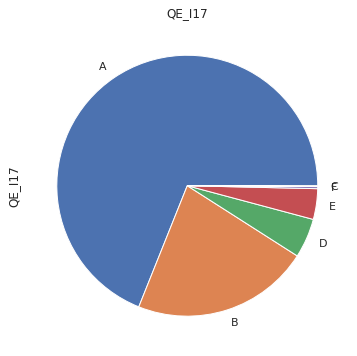

In [51]:
var_analisada= "QE_I17" # tipo de escola que cursou no ensino médio?
#A = Todo em escola pública.
#B = Todo em escola privada (particular).
#C = Todo no exterior.
#D = A maior parte em escola pública.
#E = A maior parte em escola privada (particular).
#F = Parte no Brasil e parte no exterior.

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I17
A    40.249339
B    46.855068
C    41.289011
D    39.440942
E    41.646476
F    48.517352
Name: Notas, dtype: float64
Desvio de Notas QE_I17
A    13.814311
B    15.316615
C    16.633577
D    13.799776
E    14.539076
F    16.366364
Name: Notas, dtype: float64


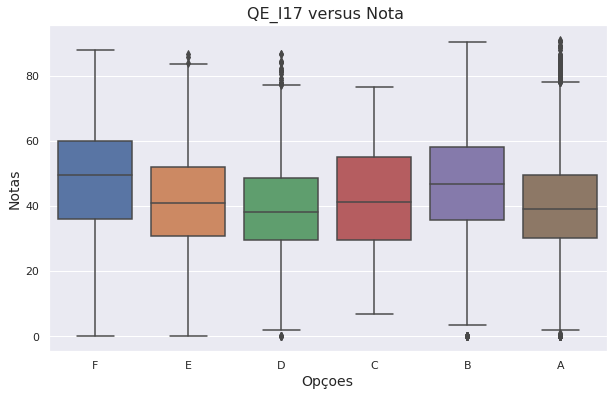

In [53]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

Media de Notas QE_I17
A    40.249339
B    46.855068
C    41.289011
D    39.440942
E    41.646476
F    48.517352
Name: Notas, dtype: float64
Desvio de Notas QE_I17
A    13.814311
B    15.316615
C    16.633577
D    13.799776
E    14.539076
F    16.366364
Name: Notas, dtype: float64


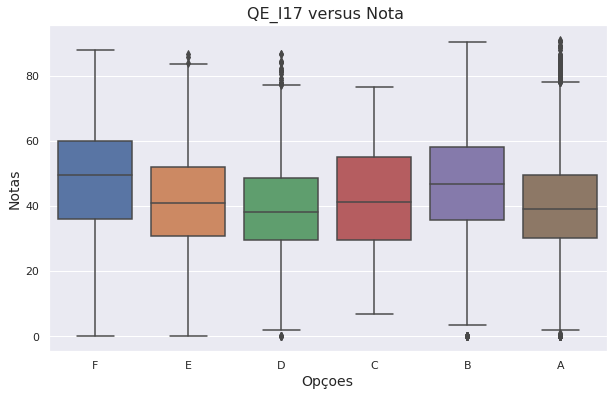

In [54]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

### Desempenho dos estudantes de acordo com a faixa de idade

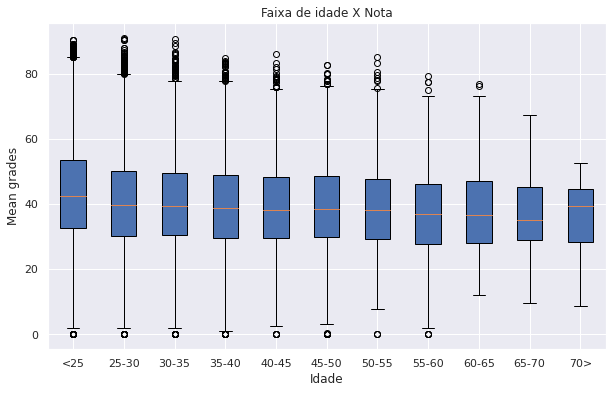

In [55]:
labels = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70>']
dados = []

#Sem retirar todos os NAN, o boxplot do Matplotlib não funciona
df_aux = df[df['Notas'].notna()]

#pega um sub dataset somente com as notas  
dados.append(df_aux.query('NU_IDADE <= 25')['Notas'])
dados.append(df_aux.query('NU_IDADE > 25 & NU_IDADE <=30')['Notas'])
dados.append(df_aux.query('NU_IDADE > 30 & NU_IDADE <=35')['Notas'])
dados.append(df_aux.query('NU_IDADE > 35 & NU_IDADE <=40')['Notas'])
dados.append(df_aux.query('NU_IDADE > 40 & NU_IDADE <=45')['Notas'])
dados.append(df_aux.query('NU_IDADE > 45 & NU_IDADE <=50')['Notas'])
dados.append(df_aux.query('NU_IDADE > 50 & NU_IDADE <=55')['Notas'])
dados.append(df_aux.query('NU_IDADE > 55 & NU_IDADE <=60')['Notas'])
dados.append(df_aux.query('NU_IDADE > 60 & NU_IDADE <=65')['Notas'])
dados.append(df_aux.query('NU_IDADE > 65 & NU_IDADE <=70')['Notas'])
dados.append(df_aux.query('NU_IDADE > 70')['Notas'])


plt.figure(figsize=(10,6))
plt.boxplot(dados,patch_artist=True, labels=labels)
plt.title('Faixa de idade X Nota')
plt.ylabel('Mean grades')
plt.xlabel('Idade')
plt.show()

### Desempenho durante a graduação de acordo com o questionario respondido

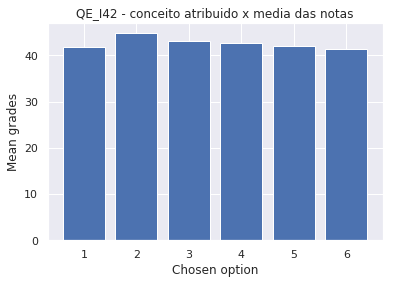

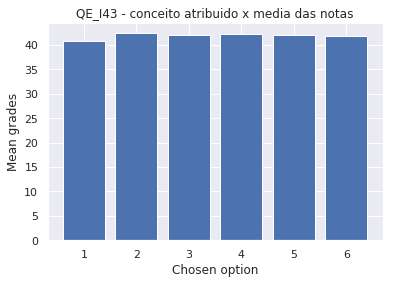

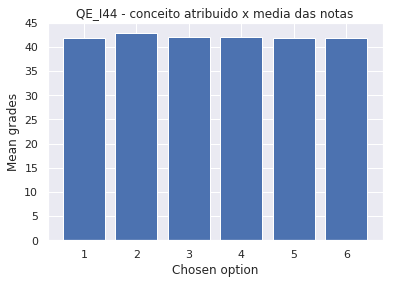

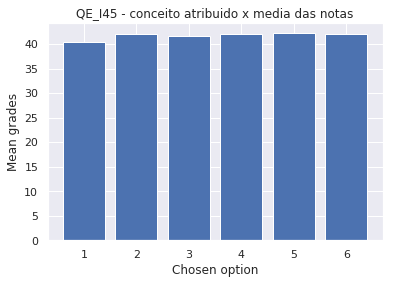

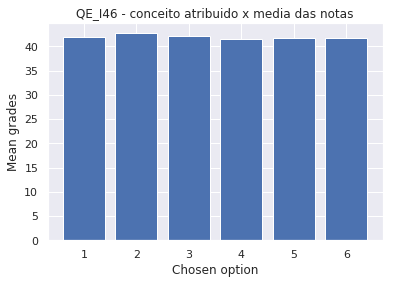

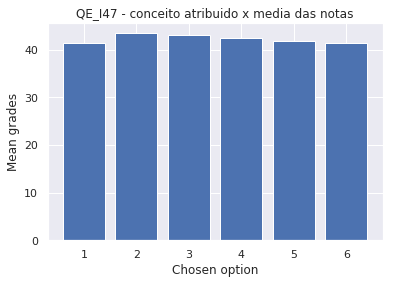

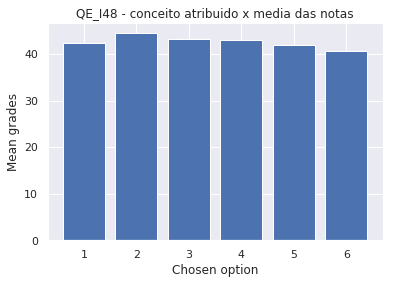

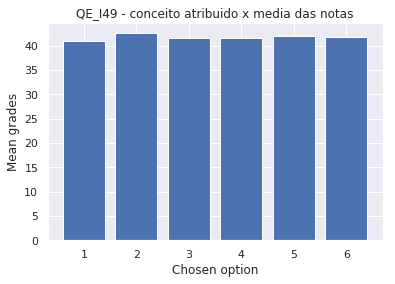

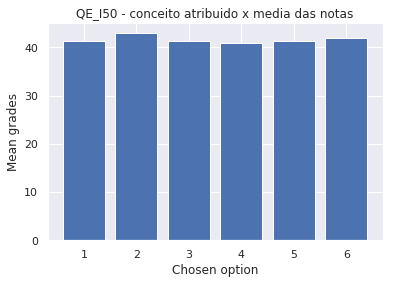

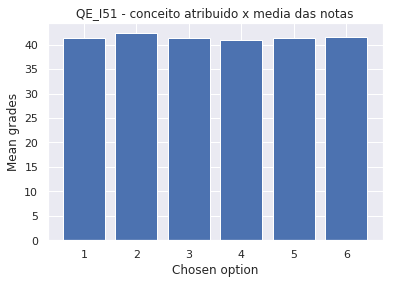

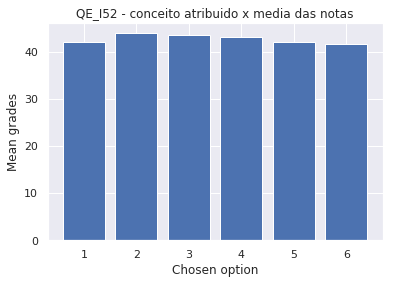

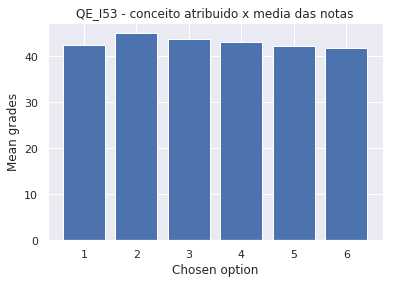

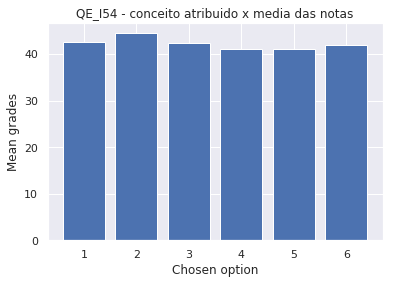

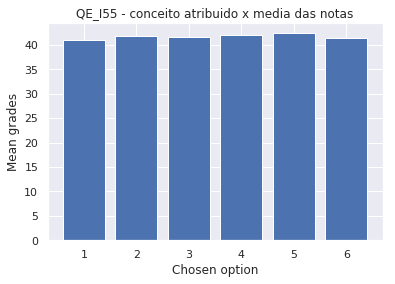

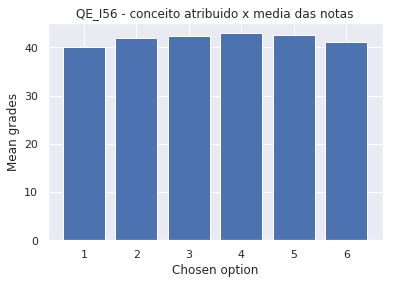

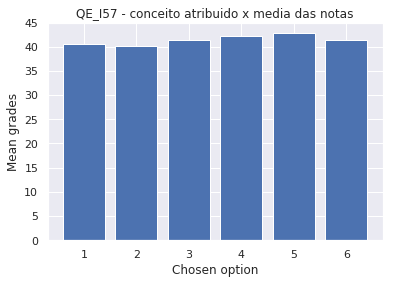

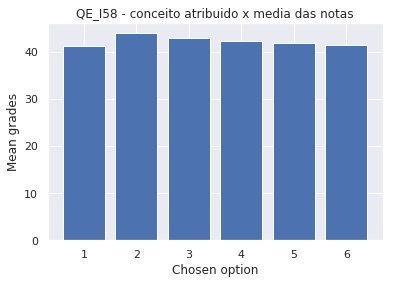

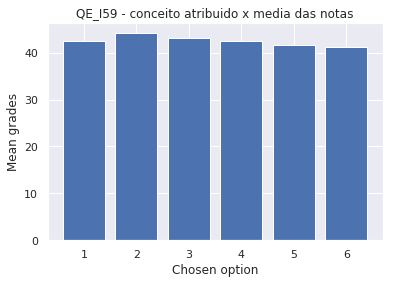

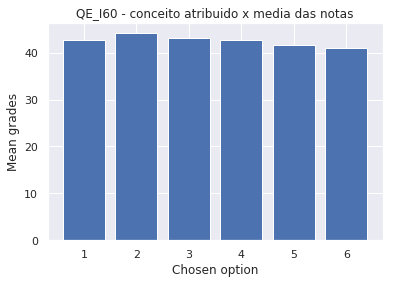

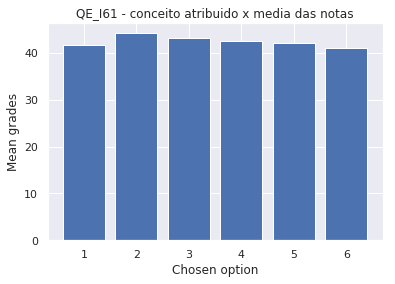

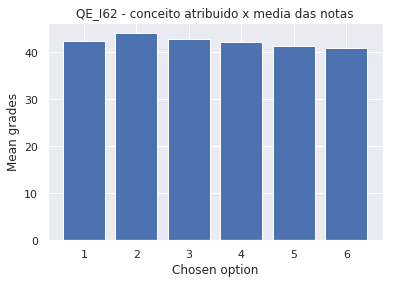

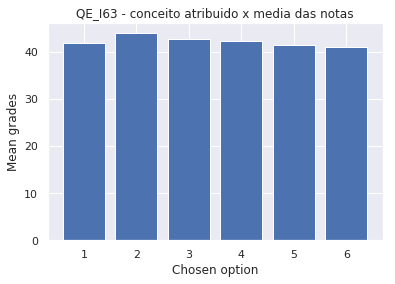

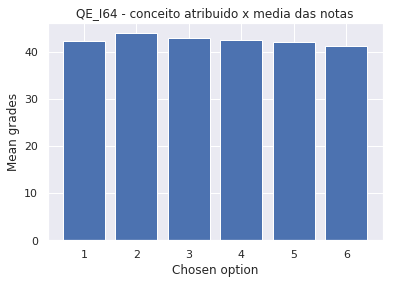

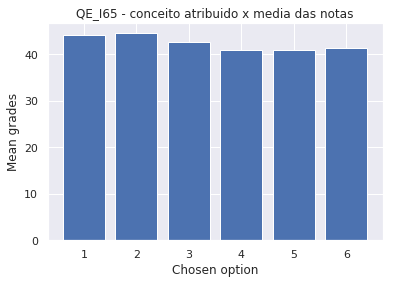

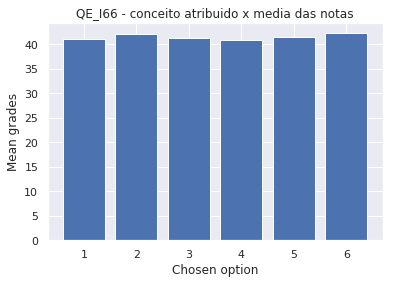

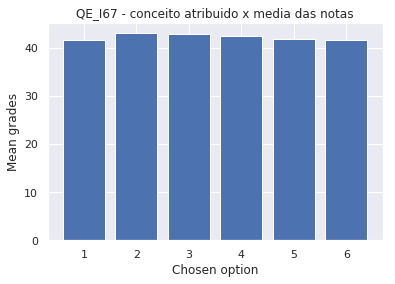

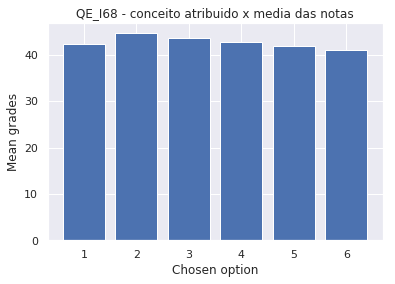

In [38]:
#Média das notas em relação as opções escolhidas pelos alunos

var_media = 'Notas'
aux = 42 #Inicio dos questionarios sobre como se deu a graduação.
while True:
    var_grupo = 'QE_I'+ str(aux)
    group_1 = df[df[var_grupo] == 1]
    mean1 = group_1[var_media].mean()
    group_2 = df[df[var_grupo] == 2]
    mean2 = group_2[var_media].mean()
    group_3 = df[df[var_grupo] == 3]
    mean3 = group_3[var_media].mean()
    group_4 = df[df[var_grupo] == 4]
    mean4 = group_4[var_media].mean()
    group_5 = df[df[var_grupo] == 5]
    mean5 = group_5[var_media].mean()
    group_6 = df[df[var_grupo] == 6]
    mean6 = group_6[var_media].mean()
    group_7 = df[df[var_grupo] == 7]
    mean7 = group_7[var_media].mean()
    group_8 = df[df[var_grupo] == 8]
    mean8 = group_8[var_media].mean()
    names = [1,2,3,4,5,6,7,8]
    #names = ['1 -'+str(group_1['NU_ANO'].count()),
    #         ' 2 -'+str(group_2['NU_ANO'].count()),
    #         ' 3 -'+str(group_3['NU_ANO'].count()),
    #         ' 4 -'+str(group_4['NU_ANO'].count()),
    #         ' 5 -'+str(group_5['NU_ANO'].count()),
    #         ' 6 -'+str(group_6['NU_ANO'].count()),
    #         ' 7 -'+str(group_7['NU_ANO'].count()),
    #         ' 8 -'+str(group_8['NU_ANO'].count())]
    plt.bar(names,[mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8])
    plt.title('QE_I'+ str(aux)+ ' - conceito atribuido x media das notas')
    plt.ylabel('Mean grades')
    plt.xlabel('Chosen option')
    plt.savefig('DADOS_ENADE_2017/QE_I'+str(aux)+'.png', format='png')
    plt.show()
    if aux == 68:# 68 é a ultima questão do questionario
        break
    else:
        aux+=1

### Quantidade de alunos por área de enquadramaneto de curso 

In [56]:
df.groupby('CO_GRUPO')['NU_ANO'].value_counts()

CO_GRUPO  NU_ANO
1         2018      20442
2         2018      27485
13        2018       1566
18        2018       7128
22        2018      13047
26        2018       1248
29        2018        839
38        2018       3934
67        2018        260
81        2018       1451
83        2018        227
84        2018        923
85        2018       1997
86        2018       4387
87        2018       1152
88        2018       1190
93        2018       1350
94        2018       2243
100       2018        802
101       2018       1375
102       2018        512
103       2018        386
104       2018        461
105       2018        162
106       2018       1670
803       2018       1764
804       2018       1998
Name: NU_ANO, dtype: int64

### Quantidade de alunos por sexo em área de enquadramaneto de curso

In [ ]:

df.groupby('CO_GRUPO')['TP_SEXO'].value_counts()

### Comparações com as escolaridades dos pais em todas as combinações possíveis em relação a nota do estudante
#### A = Nenhuma.
#### B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#### C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#### D = Ensino Médio.
#### E = Ensino Superior - Graduação.
#### F = Pós-graduação.

In [57]:
array_father = ['A','B','C', 'D', 'E', 'F']
array_mather = ['A','B','C', 'D', 'E', 'F']
array_aux = []
for i in array_father:
    for j in array_mather:
        Estudo_dos_pais = df[(df['QE_I04'] == i) & (df['QE_I05'] == j)]
        grade = Estudo_dos_pais['Notas'].mean()
        array_aux.append(f' Mean students grades: {grade:.2f} - Father is: '+str(i)+' and Mother is: '+str(j))
        
        #print(f'Grade: {grade:.2f} - Father is: '+str(i)+' and Mother is: '+str(j))
ordenado = sorted(array_aux)
for i in ordenado:
    print(i)

 Mean students grades: 34.97 - Father is: E and Mother is: A
 Mean students grades: 37.62 - Father is: F and Mother is: A
 Mean students grades: 37.79 - Father is: B and Mother is: A
 Mean students grades: 38.17 - Father is: E and Mother is: B
 Mean students grades: 38.63 - Father is: B and Mother is: B
 Mean students grades: 38.68 - Father is: D and Mother is: A
 Mean students grades: 38.74 - Father is: A and Mother is: B
 Mean students grades: 39.62 - Father is: A and Mother is: A
 Mean students grades: 39.74 - Father is: C and Mother is: A
 Mean students grades: 39.76 - Father is: A and Mother is: D
 Mean students grades: 40.10 - Father is: C and Mother is: C
 Mean students grades: 40.11 - Father is: B and Mother is: C
 Mean students grades: 40.26 - Father is: A and Mother is: C
 Mean students grades: 40.33 - Father is: B and Mother is: E
 Mean students grades: 40.63 - Father is: C and Mother is: B
 Mean students grades: 40.68 - Father is: B and Mother is: D
 Mean students grades: 4

#### Quando os pais juntos tem maior escolaridade, como por exemplo graduação e pós graduação, as notas dos estudantes são consideravelmente altas em relação ao estudantes que tem os pais com escolaridade mais baixa. 

### Desempenho dos estudantes que demoraram a ingressar X estudantes que ingressaram rápido na graduação

In [ ]:
# Estudantes que ingressaran rápido
# Esse processamento pode DEMORAR vários minutos. Fiz com dataset de 100.000 linhas

less_5years = df
for index, row in df.iterrows():
    if row['ANO_IN_GRAD'] - row['ANO_FIM_EM'] > 5:
        print(index, row['ANO_IN_GRAD'] - row['ANO_FIM_EM'])
        #print(index, row['NU_ANO'], row['CO_GRUPO'])
        less_5years = less_5years.drop(index)
less_5years.to_csv('entered_less_5years.csv')        


In [ ]:
# Estudantes demoraram a ingressar
# Esse processamento pode DEMORAR vários minutos Fiz com dataset de 100.000 linhas

over_5years = df
for index, row in df.iterrows():
    if row['ANO_IN_GRAD'] - row['ANO_FIM_EM'] <= 5:
        print(index, row['ANO_IN_GRAD'] - row['ANO_FIM_EM'])
        #print(index, row['NU_ANO'], row['CO_GRUPO'])
        over_5years = over_5years.drop(index)
over_5years.to_csv('entered_over_5years.csv')        

### lendo o dataset com estudantes que concluiram o ensino médio é ingressaram ATÉ 5 anos no ensino superior

In [58]:
name_path_csv = "DADOS_ENADE_2018/entered_less_5years.csv"
arquivo = open(name_path_csv)
less_5years = pd.read_csv(arquivo, delimiter=",")
less_5years = less_5years.drop(['Unnamed: 0'], axis=1)
less_5years.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,42.8
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,60.9
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,25.0
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,42.4
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,40.0


### lendo o dataset com estudantes que concluiram o ensino médio é ingressaram A MAIS DE 5 anos no ensino superior

In [59]:
name_path_csv = "DADOS_ENADE_2018/entered_over_5years.csv"
arquivo = open(name_path_csv)
over_5years = pd.read_csv(arquivo, delimiter=",")
over_5years = over_5years.drop(['Unnamed: 0'], axis=1)
over_5years.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,59.3
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,55.7
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,51.5
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,57.6
4,2018,1356,10003,10020,2,67852,1,3546603,35,3,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,69.1


### Idade média dos estudantes que ingresaram em até 5 anos

In [60]:
less_5years['NU_IDADE'].mean()

25.159075979855483

### Idade média dos estudantes que ingresaram a mais de 5 anos

In [61]:
over_5years['NU_IDADE'].mean()

35.794182080363825

In [62]:
print('-- Estudantes ingressantes ANTES de 5 anos -- ')
print('Média: '+str(less_5years['Notas'].mean()))
print('Desvio: '+str(less_5years['Notas'].std()))

print('-- Estudantes ingressantes DEPOIS de 5 anos -- ')
print('Média: '+str(over_5years['Notas'].mean()))
print('Desvio: '+str(over_5years['Notas'].std()))

-- Estudantes ingressantes ANTES de 5 anos -- 
Média: 42.28338312829543
Desvio: 14.74070291553648
-- Estudantes ingressantes DEPOIS de 5 anos -- 
Média: 40.68195839543777
Desvio: 13.900066350301316


#### Estudantes que ingressaram mais rápido tem uma nota média um pouco melhor


### Cria grafico de pizza duplo com a quantidade de alunos que ingressaram a menos e a mais de 5 anos em determinada categoria 

In [63]:


def qtd_estudantes_less_e_over(var_analisada):
    over_data = []
    less_data = []

    # Pega os indeces
    

    #somas os indeces e armazena em um array
    for i in over_order:
        total = over_5years[over_5years[var_analisada] == i]
        total = total[var_analisada].count()
        #print(str(i)+' '+str(total))
        over_data.append(total)
    
    #Mesmos passos de cima, mas com os dados dos estudande que ingressaram a menos de 5 anos
    #print(less_opcoes_escolhidas[var_analisada].count())
    
    for i in less_order:
        total2 = less_5years[less_5years[var_analisada] == i]
        total2 = total2[var_analisada].count()
        #print(str(i)+' '+str(total2))
        less_data.append(total2)
   
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
    ax1.pie(over_data, labels=over_order, radius = 1.5)
    ax2 = fig.add_axes([.6, .0, .5, .5], aspect=1)
    ax2.pie(less_data, labels=less_order, radius = 1.5)
    ax1.set_title('Over 5 years\n\n', size='15')
    ax2.set_title('Less 5 years\n\n', size='15')
    plt.show()

### Cria boxplot das notas dos estudantes que ingressaram A MAIS de 5 anos em relação a alguma variável

In [64]:
def over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas):
    # change the graphic size
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=over_opcoes_escolhidas,order=over_order,ax=ax)
    bplot.axes.set_title('Over 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)
    over_opcoes_escolhidas.head()
    
def over_media_e_desvio(var_analisada,over_opcoes_escolhidas):
    Media=over_opcoes_escolhidas.groupby(var_analisada)['Notas'].mean()
    Desvio=over_opcoes_escolhidas.groupby(var_analisada)['Notas'].std()
    print("Media de Notas",Media)
    print("Desvio de Notas",Desvio)

### Cria boxplot das notas dos estudantes que ingressaram A MENOS de 5 anos em relação a alguma variável

In [65]:

def less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=less_opcoes_escolhidas,order=less_order, ax=ax)
    bplot.axes.set_title('Less 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)
    less_opcoes_escolhidas.head()

def less_media_e_desvio(var_analisada,less_opcoes_escolhidas):
    Media=less_opcoes_escolhidas.groupby(var_analisada)['Notas'].mean()
    Desvio=less_opcoes_escolhidas.groupby(var_analisada)['Notas'].std()
    print("Media de Notas",Media)
    print("Desvio de Notas",Desvio)

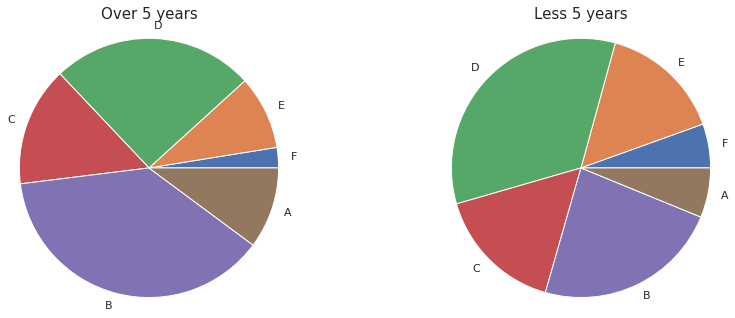

In [66]:
var_analisada = 'QE_I04'
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

qtd_estudantes_less_e_over(var_analisada)

Media de Notas QE_I04
A    38.716528
B    39.278294
C    40.986707
D    41.896990
E    43.174102
F    47.797101
Name: Notas, dtype: float64
Desvio de Notas QE_I04
A    13.383866
B    13.181094
C    13.490349
D    14.210553
E    15.111828
F    16.089357
Name: Notas, dtype: float64


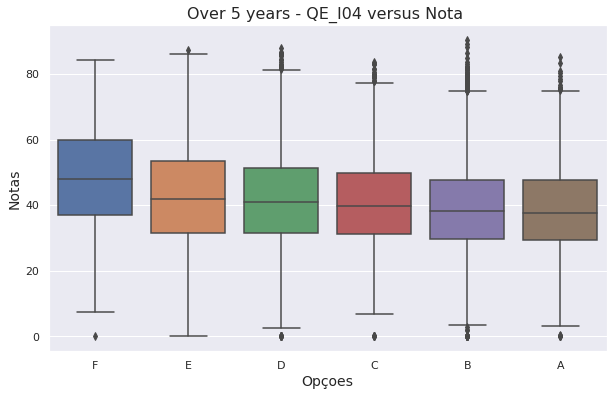

In [67]:

over_media_e_desvio(var_analisada,over_opcoes_escolhidas)
over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas)

Media de Notas QE_I04
A    40.220928
B    39.501361
C    41.118619
D    42.563531
E    45.445109
F    49.753653
Name: Notas, dtype: float64
Desvio de Notas QE_I04
A    14.289152
B    13.714196
C    13.912999
D    14.638929
E    15.508389
F    15.816280
Name: Notas, dtype: float64


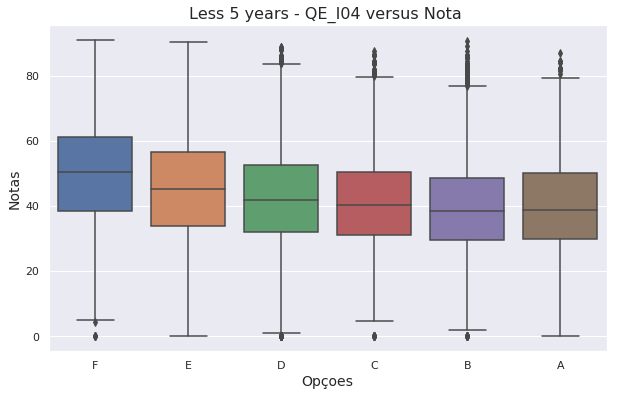

In [50]:
less_media_e_desvio(var_analisada,less_opcoes_escolhidas)
less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas)

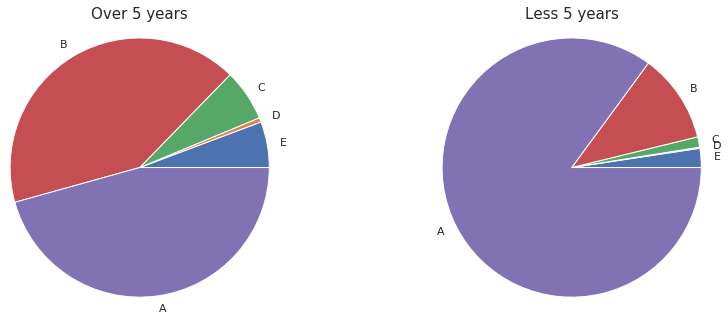

In [51]:
var_analisada = 'QE_I01'
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

qtd_estudantes_less_e_over(var_analisada)

Media de Notas QE_I01
A    40.868691
B    40.745136
C    39.888580
D    36.619394
E    40.370006
Name: Notas, dtype: float64
Desvio de Notas QE_I01
A    14.281344
B    13.605428
C    13.410008
D    13.108808
E    13.357080
Name: Notas, dtype: float64


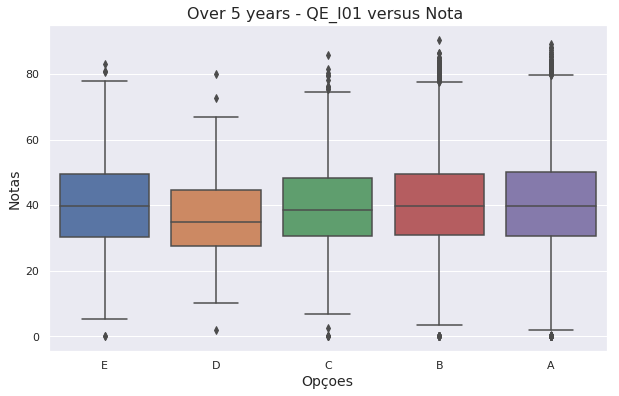

In [52]:
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_media_e_desvio(var_analisada,over_opcoes_escolhidas)
over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas)

Media de Notas QE_I01
A    42.908952
B    38.740270
C    37.563040
D    41.614286
E    39.590000
Name: Notas, dtype: float64
Desvio de Notas QE_I01
A    14.844462
B    13.575783
C    12.675909
D    13.265147
E    13.790813
Name: Notas, dtype: float64


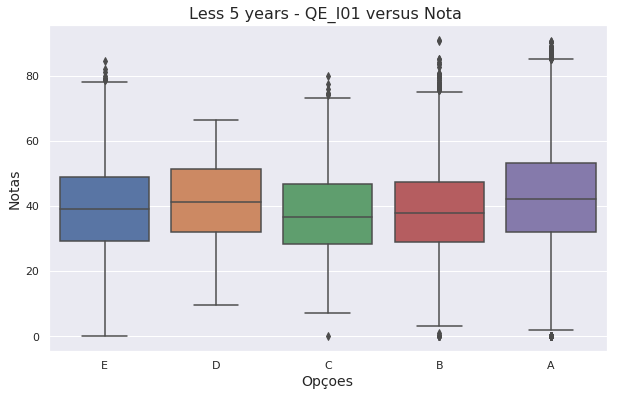

In [53]:
less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_media_e_desvio(var_analisada,less_opcoes_escolhidas)
less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas)

#### Alunos solteiros e viuvos que ingressaram mais rápido tiveram notas um pouco melhores 

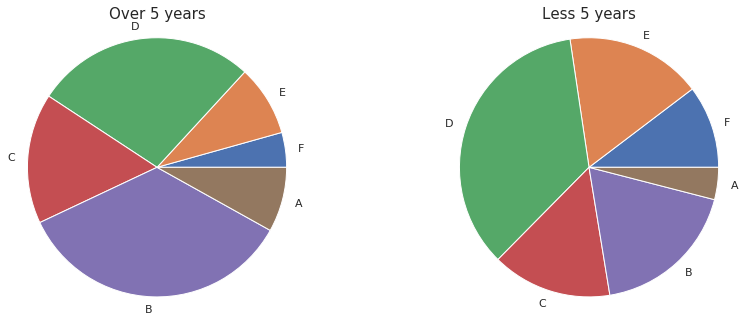

In [271]:
var_analisada = 'QE_I05'
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

qtd_estudantes_less_e_over(var_analisada)

Media de Notas QE_I05
A    38.168432
B    39.223889
C    40.788233
D    41.703002
E    43.536370
F    45.071946
Name: Notas, dtype: float64
Desvio de Notas QE_I05
A    13.505426
B    13.190686
C    13.337345
D    14.130788
E    14.924218
F    15.883946
Name: Notas, dtype: float64


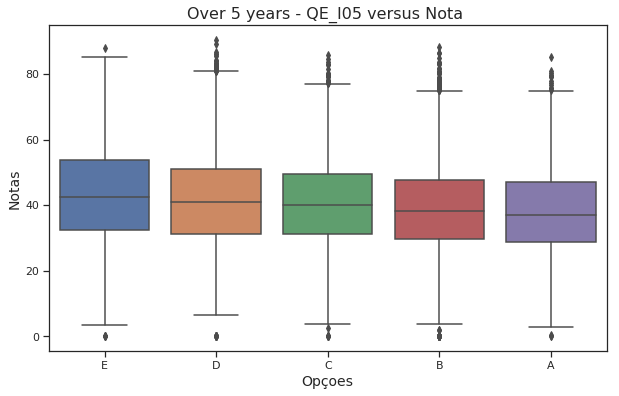

In [253]:
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_media_e_desvio(var_analisada,over_opcoes_escolhidas)
over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas)

Media de Notas QE_I05
A    40.130300
B    39.262416
C    40.767191
D    42.148545
E    44.945311
F    46.983038
Name: Notas, dtype: float64
Desvio de Notas QE_I05
A    14.856715
B    13.566894
C    13.908487
D    14.584436
E    15.294178
F    15.514357
Name: Notas, dtype: float64


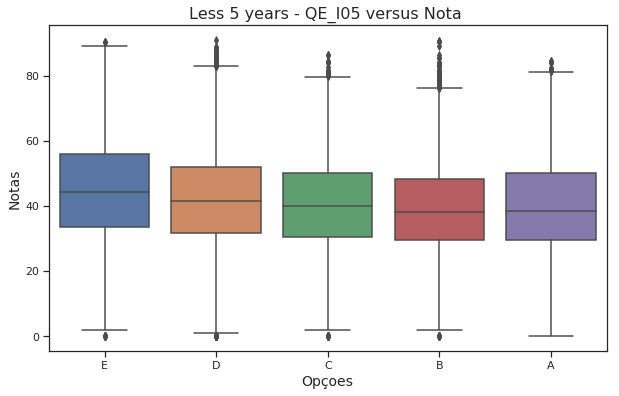

In [254]:
less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_media_e_desvio(var_analisada,less_opcoes_escolhidas)
less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas)

#### Alunos que ingressaram mais rápido e que tem pais cada vez mais mais estudados, tiveram notas um pouco melhores 

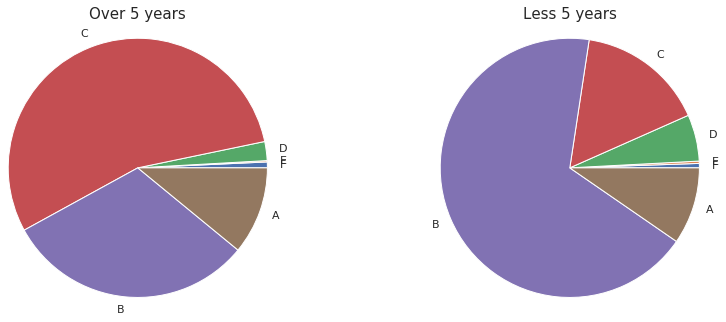

In [272]:
var_analisada = 'QE_I06'
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

qtd_estudantes_less_e_over(var_analisada)

Media de Notas QE_I06
A    40.490726
B    40.747842
C    40.483807
D    44.813169
E    43.466038
F    44.413551
Name: Notas, dtype: float64
Desvio de Notas QE_I06
A    14.588294
B    13.997499
C    13.579761
D    14.840861
E    17.021558
F    15.783784
Name: Notas, dtype: float64


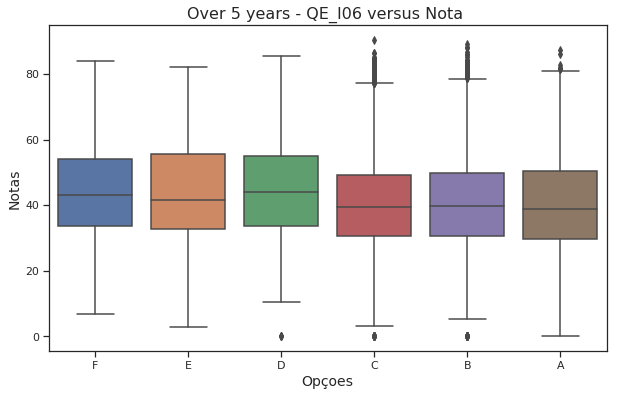

In [273]:
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_media_e_desvio(var_analisada,over_opcoes_escolhidas)
over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas)

Media de Notas QE_I06
A    42.083876
B    42.718420
C    38.593867
D    47.443014
E    49.296296
F    43.041935
Name: Notas, dtype: float64
Desvio de Notas QE_I06
A    15.117667
B    14.665588
C    13.485730
D    15.570294
E    16.030394
F    16.193917
Name: Notas, dtype: float64


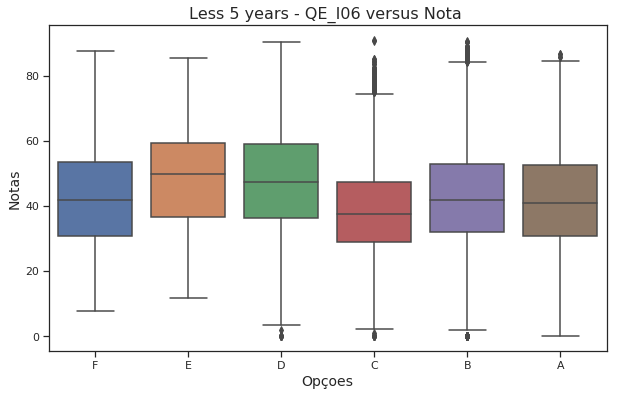

In [274]:
less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_media_e_desvio(var_analisada,less_opcoes_escolhidas)
less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas)

#### Estudantes que ingressaram depois de 5 anos e que moram em alojamento universitário da própria instituição tem a nota muito abaixo da outra classe de aluno

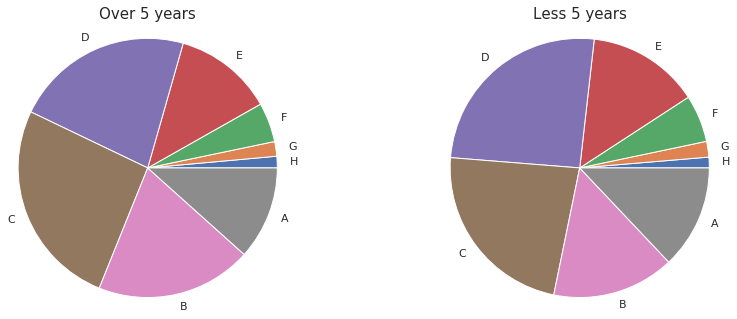

In [280]:
var_analisada = 'QE_I07'
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

qtd_estudantes_less_e_over(var_analisada)

Media de Notas QE_I07
A    42.070252
B    41.643377
C    40.840320
D    40.384165
E    39.691739
F    38.785039
G    37.849023
H    38.453333
Name: Notas, dtype: float64
Desvio de Notas QE_I07
A    14.977792
B    14.092398
C    13.815724
D    13.667071
E    13.285205
F    13.468801
G    12.828767
H    12.735710
Name: Notas, dtype: float64


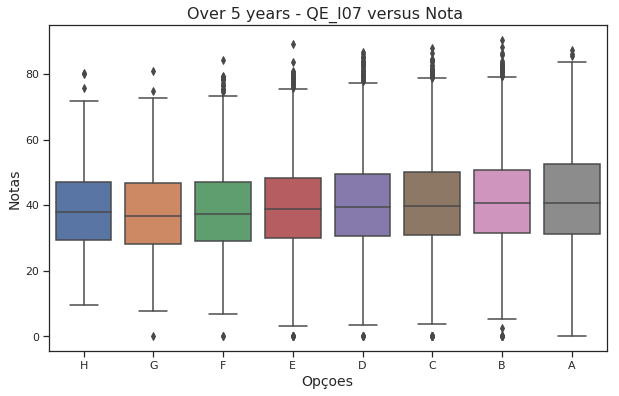

In [281]:
over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
over_media_e_desvio(var_analisada,over_opcoes_escolhidas)
over_notas_x_opcoes(var_analisada,over_opcoes_escolhidas)

Media de Notas QE_I07
A    44.675978
B    42.034629
C    42.284619
D    42.826885
E    41.311926
F    39.662009
G    39.441124
H    39.369372
Name: Notas, dtype: float64
Desvio de Notas QE_I07
A    15.579555
B    14.645686
C    14.611684
D    14.724679
E    14.326549
F    13.968915
G    13.916879
H    14.148245
Name: Notas, dtype: float64


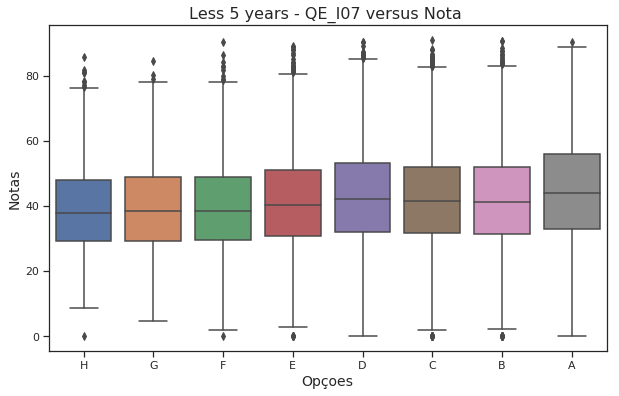

In [282]:
less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
less_media_e_desvio(var_analisada,less_opcoes_escolhidas)
less_notas_x_opcoes(var_analisada,less_opcoes_escolhidas)